
...................................................PART 2- Social Network Analysis (SNA).......................................................

SNA, for our group project, for Restaurants in Philadelphia is a method that focuses on the relationships between social entities rather than the entities themselves. It is concerned with understanding the connections between the user reviews on restaurants.

Likewise, we will present relevant info about patterns involve the overall structure of these relationships, such as network density, clusters, or the presence of key influencers.

The basis of our SNA concept, bases on the ideia that the nodes are the all restaurants in Philadephia, that the users review at least 2 of them. In this way, the edges are the quantities of reviews, by the users, that comments 2 restaurants, in comun (restaurants that comply here are the nodes). 
If a user X, did 2 reviews, 1 for a Resturant A and other for the Restaurant B so Node:Restaurant A ------Edge: Quantity of commun review=1-----Node: Restaurant B 

Note: Some graphs and numbers results where explained, to show the storytelling of our thought through the community selection (community 0, with 402 resturants and avg betweeness of 0.0026)

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import plotly.graph_objects as go
import numpy as np
from itertools import combinations
from igraph import Graph


In [19]:
df = pd.read_csv('C:\\Users\\anacc\\OneDrive\\Ambiente de Trabalho\\2nd year-master\\Análise Dados Complexos\\data\\Philadelphia_reviews.csv', encoding="utf-8")


In [12]:
# Create the business dictionaries
business_dict = {}
business_dict_inv = {}
business_dict_id = {}

# Use a loop to fill the dictionaries
i = 0
for business in df.business_id.unique():
    business_dict[business] = i
    business_dict_inv[i] = business
    
    # Access the 'restaurant_name' column
    restaurant_name = df.loc[df.business_id == business, 'restaurant_name'].values[0]
    business_dict_id[business] = restaurant_name
    
    i += 1


In [13]:
temp = []
for item in df.business_id:
  temp.append(business_dict_id[item])

df['Business'] = temp

In [14]:
df

review_id                 user_id             business_id  \
0      TdmWqB-77Lirm-XgA4JJ4A  3fTw9hmzlbMK2Q32Q-a4Hw  kxX2SOes4o-D3ZQBkiMRfA   
1      05VCJQ6DuYW8rw1gpBGG9w  c4rYJcGZ0gRl-C6SqbehQQ  kxX2SOes4o-D3ZQBkiMRfA   
2      Up0DIF2JNsIwSkBh2mSl0w  EMMKdK1cGrLSo08wgSYHJQ  kxX2SOes4o-D3ZQBkiMRfA   
3      e8loVKkBln321zORmRqoUw  fbV1aq9ASXggQyGTNN-hzg  kxX2SOes4o-D3ZQBkiMRfA   
4      3G6pKVA4cHtT4F6V_dl5Rw  TeLcAcuphfDfg-lgehu2qg  kxX2SOes4o-D3ZQBkiMRfA   
...                       ...                     ...                     ...   
10402  rXL_j9UetCN3o3NuRpqBZg  2SYFAGATQn96D8-FZNvaMw  7pwZZVVlYCxQvVdd8Q03wg   
10403  r7luPwKAcDfnPCNEGFhgyw  HwL0cUMC7-qghiAKBzMpXg  7pwZZVVlYCxQvVdd8Q03wg   
10404  20ZYS5alWclEjaXhyjgYRQ  UQIERttr5tWwid4TncXLvw  7pwZZVVlYCxQvVdd8Q03wg   
10405  RjocZKvoVVCgw4lBkO3CPA  ygvP779WApkVWlHiamB_Uw  7pwZZVVlYCxQvVdd8Q03wg   
10406  3HhZYnoSBnSki7o2V33VLQ  yIsQ4qFCyY-clmlRwQlw_w  7pwZZVVlYCxQvVdd8Q03wg   

       stars  useful  funny  cool  \
0          4       3      0     2   
1          3       0      0     0   
2          5       4      3     4   
3          5       1      0     1   
4          5       0      0     0   
...      ...     ...    ...   ...   
10402      4       1      0     1   
10403      5       0      0     0   
10404      4       2      0     0   
10405      5       0      1     0   
10406      5       1      1     1   

                                                    text                 date  \
0      I am now a regular. Pretty much every Saturday...  2012-03-30 17:55:49   
1      So a friend and I went to this Pakistani "hole...  2012-08-22 00:52:20   
2      I loveeee indian food, but I haven't ventured ...  2012-06-06 01:54:32   
3      I've been to this place a few times and while ...  2012-05-01 13:12:32   
4      Like other reviewers, I was initially a bit pu...  2012-05-04 01:03:47   
...                                                  ...                  ...   
10402  This is one of those places you're proud you k...  2012-05-21 16:42:07   
10403  This pizza arrived hot & huge!\nOn move-in day...  2012-12-29 01:11:04   
10404  Plus:\nno website\nno menu (either online or a...  2012-02-28 23:36:17   
10405  This pizza is so good! I have recently discove...  2012-05-24 22:09:31   
10406  I just found my new favorite pizza place in Ph...  2012-09-24 16:55:31   

        restaurant_name  ...                             categories  \
0                 Zaika  ...  Halal, Pakistani, Restaurants, Indian   
1                 Zaika  ...  Halal, Pakistani, Restaurants, Indian   
2                 Zaika  ...  Halal, Pakistani, Restaurants, Indian   
3                 Zaika  ...  Halal, Pakistani, Restaurants, Indian   
4                 Zaika  ...  Halal, Pakistani, Restaurants, Indian   
...                 ...  ...                                    ...   
10402  La Rosa Pizzeria  ...                     Pizza, Restaurants   
10403  La Rosa Pizzeria  ...                     Pizza, Restaurants   
10404  La Rosa Pizzeria  ...                     Pizza, Restaurants   
10405  La Rosa Pizzeria  ...                     Pizza, Restaurants   
10406  La Rosa Pizzeria  ...                     Pizza, Restaurants   

        latitude  longitude is_open  year  sentiment  \
0      40.079848 -75.025080       1  2012          1   
1      40.079848 -75.025080       1  2012          1   
2      40.079848 -75.025080       1  2012          1   
3      40.079848 -75.025080       1  2012          1   
4      40.079848 -75.025080       1  2012          1   
...          ...        ...     ...   ...        ...   
10402  39.924147 -75.170077       1  2012          1   
10403  39.924147 -75.170077       1  2012          1   
10404  39.924147 -75.170077       1  2012          1   
10405  39.924147 -75.170077       1  2012          1   
10406  39.924147 -75.170077       1  2012          1   

       text_length_before_clean  \
0                           174   
1                          1205  

Goal: Identify which restaurants hold central or influential positions in the network based on their relationships (reviews they have in common with other restaurants).

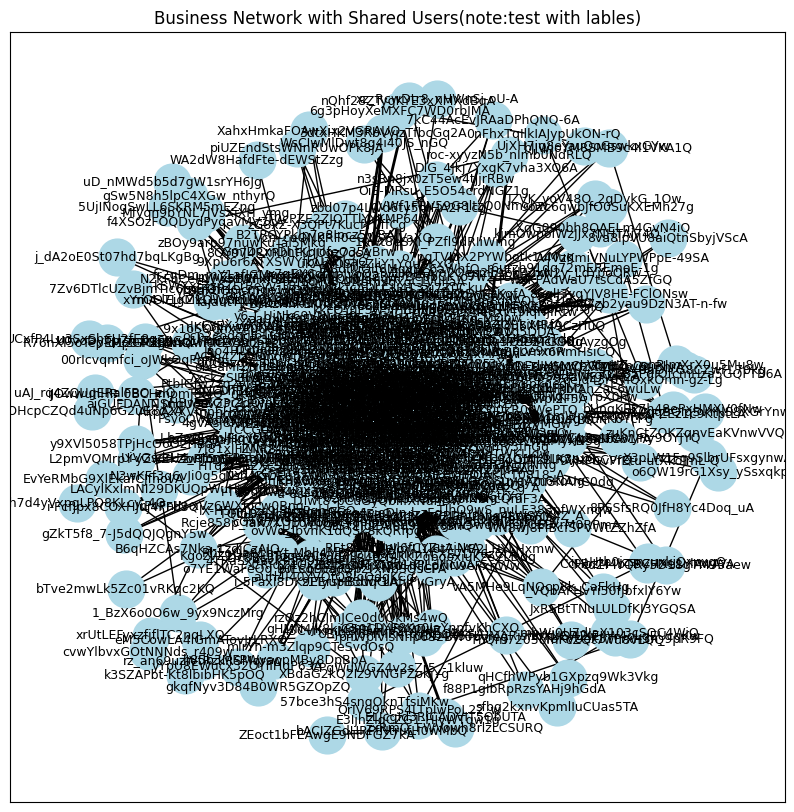

In [5]:
# Create a user-business mapping
user_business_df = df[['user_id', 'business_id']]

# Group by user_id to find which businesses each user has commented on
user_business_groups = user_business_df.groupby('user_id')['business_id'].apply(list)

# Create an empty graph
G = nx.Graph()

# Iterate through each user and their businesses
for businesses in user_business_groups:
    # Add edges between businesses commented by the same user
    for i in range(len(businesses)):
        for j in range(i + 1, len(businesses)):
            # Check if an edge between the two businesses already exists
            if G.has_edge(businesses[i], businesses[j]):
                # If it exists, increment the edge weight (number of users who commented on both)
                G[businesses[i]][businesses[j]]['weight'] += 1
            else:
                # If it doesn't exist, create a new edge with weight 1
                G.add_edge(businesses[i], businesses[j], weight=1)

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.5)  # Layout for positioning nodes
edges = G.edges(data=True)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw the edges with varying thickness based on weight (number of users)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges])

# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=9, font_family='sans-serif')

# Show the plot-the final one with lables
plt.title('Business Network with Shared Users(note:test with lables)')
plt.show()

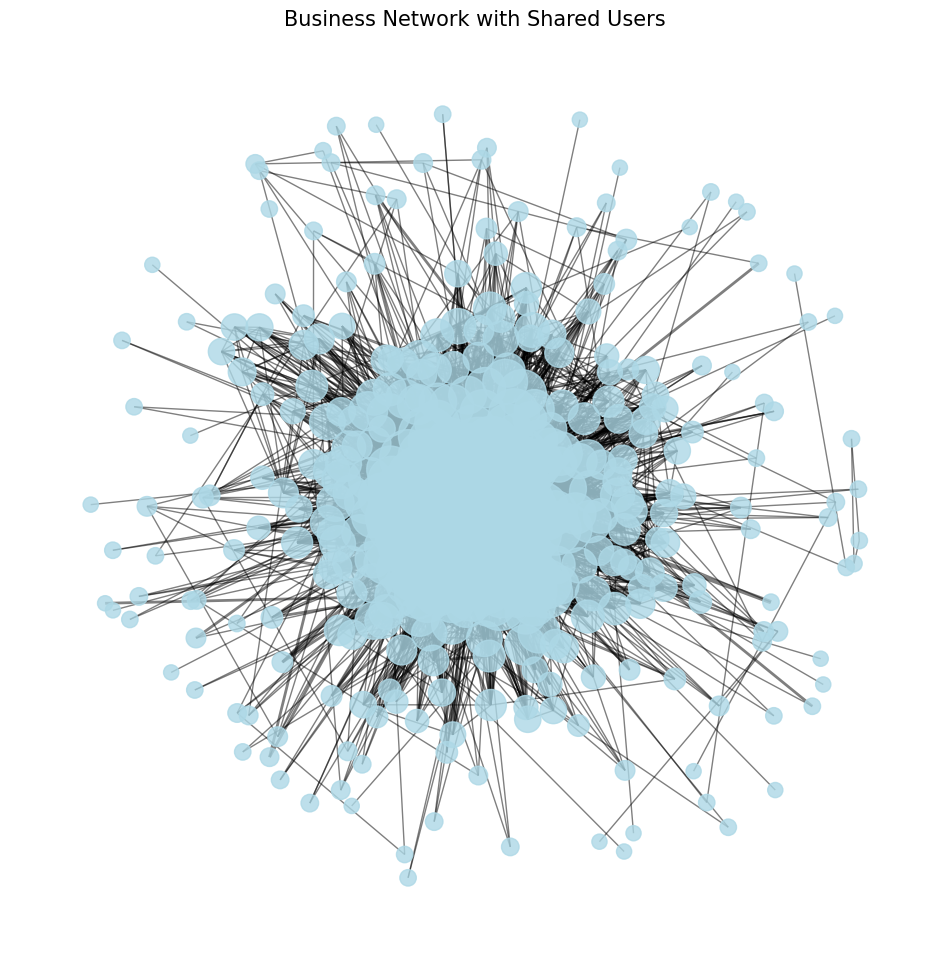

In [6]:
# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Layout for positioning nodes

# Draw the nodes with smaller size based on degree
node_sizes = [100 + 20 * G.degree(n) for n in G.nodes()]  # Further decreased size multiplier
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.8)

# Draw the edges with varying thickness based on weight (number of users)
edges = G.edges(data=True)
edge_widths = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, alpha=0.5)

# Set the background color-white smoke
plt.gca().set_facecolor('whitesmoke')

# Remove labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')  # Commented out

# Add a title and remove axis
plt.title('Business Network with Shared Users', fontsize=15)
plt.axis('off')  # Turn off the axis for a cleaner presentation

# Show the plot
plt.show()

This code generates and visualizes a network of businesses based on shared users who have commented on them. The graph representation helps identify which businesses are interconnected through their users, making it useful for analyzing business relationships and interactions.

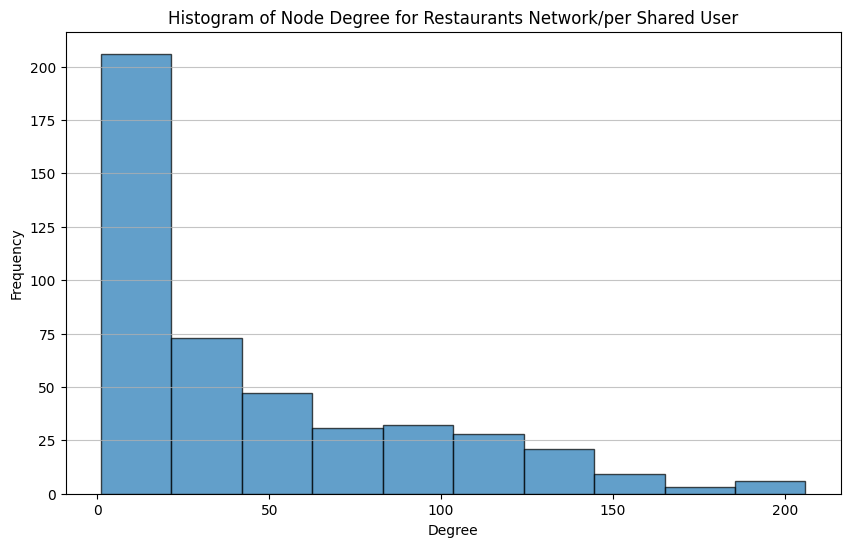

In [11]:
#Creating Histogram of node degrees
plt.figure(figsize=(10, 6))
plt.hist(deg, bins=10, edgecolor='black', alpha=0.7)  # Using 10 bins for clarity
plt.title("Histogram of Node Degree for Restaurants Network/per Shared User")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)

# Optional: Set y-axis to logarithmic scale for better visibility
# plt.yscale('log')

plt.show()


This histogram shows how many businesses restaurants have different degrees of connections (i.e., how many  restaurantsare connected through shared users).
 A higher degree indicates that a business is frequently connected to others through users who have commented on multiple  restaurants. This visualization is useful for understanding the structure of the user-business network and identifying which restaurants are most central or interconnected.
A frequency of 30 means that there are 30 nodes (restaurants) in your graph that have a degree of 100. In other words, there are 30 different businesses  restaurants that are each connected to 100 users.

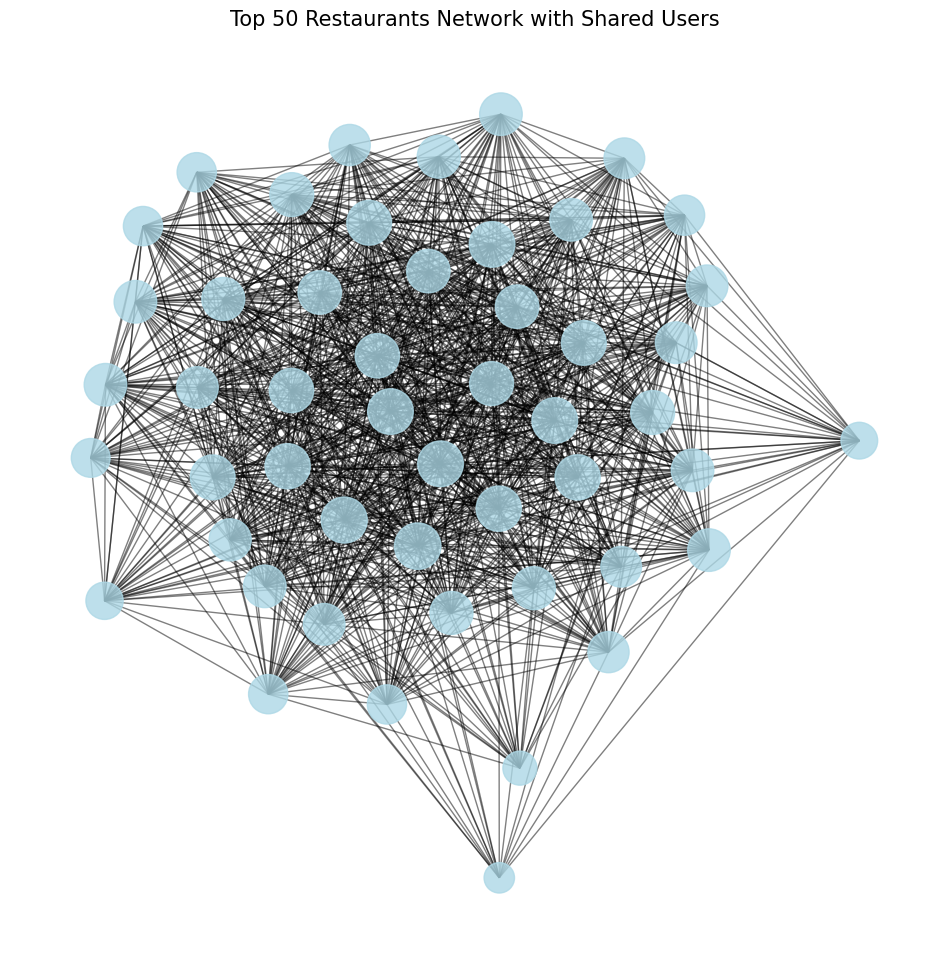

In [18]:
#Creation of Node Chart by Top 50 Restaurants, with share users (based on reviews)
# Count the number of reviews for each restaurant
restaurant_review_counts = df['business_id'].value_counts()

# Get the top 50 restaurants based on review count
top_50_restaurants = restaurant_review_counts.nlargest(50).index.tolist()

# Filter the original DataFrame to include only the top 50 restaurants
top_50_df = df[df['business_id'].isin(top_50_restaurants)]

# Create a user-business mapping
user_business_df = top_50_df[['user_id', 'business_id']]

# Group by user_id to find which businesses each user has commented on
user_business_groups = user_business_df.groupby('user_id')['business_id'].apply(list)

# Create an empty graph
G = nx.Graph()

# Iterate through each user and their businesses
for businesses in user_business_groups:
    for i in range(len(businesses)):
        for j in range(i + 1, len(businesses)):
            # Add edge between businesses
            G.add_edge(businesses[i], businesses[j], weight=1)

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)  # Layout for positioning nodes

# Draw the nodes with smaller size based on degree
node_sizes = [100 + 20 * G.degree(n) for n in G.nodes()]  # Smaller size calculation
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.8)

# Draw the edges with varying thickness based on weight (number of users)
edges = G.edges(data=True)
edge_widths = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, width=edge_widths, alpha=0.5)

# Optional: Set the background color
plt.gca().set_facecolor('whitesmoke')

# Remove labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')  # Commented out

# Add a title and remove axis
plt.title('Top 50 Restaurants Network with Shared Users', fontsize=15)
plt.axis('off')  # Turn off the axis for a cleaner presentation

# Show the plot
plt.show()

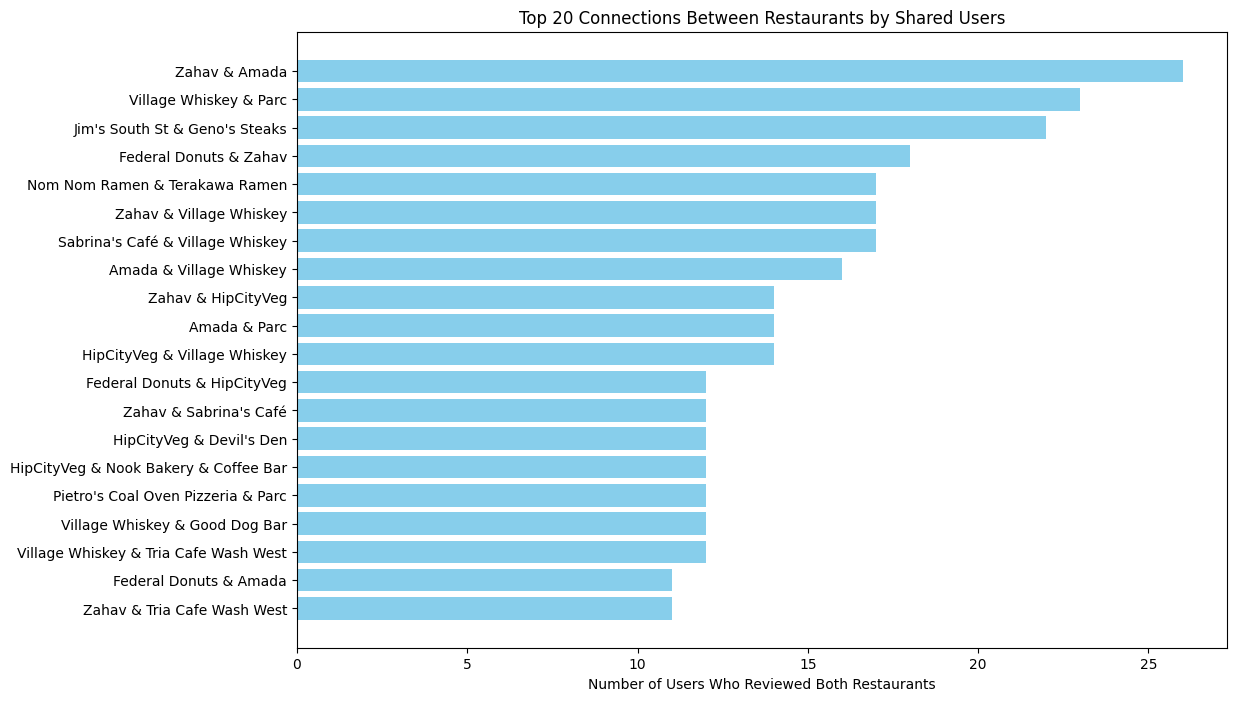

                   Restaurant_1              Restaurant_2  User_Count
0                         Zahav                     Amada          26
1               Village Whiskey                      Parc          23
2                Jim's South St             Geno's Steaks          22
3                Federal Donuts                     Zahav          18
4                 Nom Nom Ramen            Terakawa Ramen          17
5                         Zahav           Village Whiskey          17
6                Sabrina's Café           Village Whiskey          17
7                         Amada           Village Whiskey          16
8                         Zahav                HipCityVeg          14
9                         Amada                      Parc          14
10                   HipCityVeg           Village Whiskey          14
11               Federal Donuts                HipCityVeg          12
12                        Zahav            Sabrina's Café          12
13                  

In [12]:
#Top 20 Connections Between Restaurants by Shared Users
# Create an empty graph
G = nx.Graph()

# Iterate through each user and their businesses
for businesses in user_business_groups:
    # Add edges between businesses commented by the same user
    for i in range(len(businesses)):
        for j in range(i + 1, len(businesses)):
            if G.has_edge(businesses[i], businesses[j]):
                G[businesses[i]][businesses[j]]['weight'] += 1
            else:
                G.add_edge(businesses[i], businesses[j], weight=1)

# Extract edges and their weights
edges_with_weights = [(u, v, d['weight']) for u, v, d in G.edges(data=True)]

# Create a DataFrame for easier manipulation
edges_df = pd.DataFrame(edges_with_weights, columns=['Business_1', 'Business_2', 'User_Count'])

# Map business_id to restaurant names using the original df DataFrame
# Create a mapping from business_id to restaurant_name
business_mapping = dict(zip(df['business_id'], df['restaurant_name']))

# Use the mapping to create new columns for restaurant names
edges_df['Restaurant_1'] = edges_df['Business_1'].map(business_mapping)
edges_df['Restaurant_2'] = edges_df['Business_2'].map(business_mapping)

# Sort the DataFrame by User_Count in descending order and select the top 20
top_edges = edges_df.sort_values(by='User_Count', ascending=False).head(20)

# Create a new column for the combined restaurant names
top_edges['Restaurant_Pair'] = top_edges['Restaurant_1'] + ' & ' + top_edges['Restaurant_2']

# Plotting the top connections
plt.figure(figsize=(12, 8))
plt.barh(top_edges['Restaurant_Pair'], top_edges['User_Count'], color='skyblue')
plt.xlabel('Number of Users Who Reviewed Both Restaurants')
plt.title('Top 20 Connections Between Restaurants by Shared Users')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# Display the table of top edges
top_edges.reset_index(drop=True, inplace=True)
print(top_edges[['Restaurant_1', 'Restaurant_2', 'User_Count']])


In [120]:
# Inspect unique users and businesses
unique_users = df['user_id'].nunique()
unique_businesses = df['business_id'].nunique()

# Check for duplicate reviews between the same users and businesses
duplicates = df.duplicated(subset=['user_id', 'business_id'], keep=False)

print(f"Number of unique users: {unique_users}")
print(f"Number of unique businesses: {unique_businesses}")
print(f"Number of duplicate reviews: {duplicates.sum()}")

Number of unique users: 5916
Number of unique businesses: 501
Number of duplicate reviews: 332


In [121]:
# Top 5 users by degree centrality
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by degree centrality:", top_degree)

# Top 5 users by betweenness centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by betweenness centrality:", top_betweenness)

# Top 5 users by closeness centrality
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by closeness centrality:", top_closeness)


Top 5 users by degree centrality: [('Dv6RfXLYe1atjgz3Xf4GGw', 0.45274725274725275), ('ctHjyadbDQAtUFfkcAFEHw', 0.44395604395604393), ('EtKSTHV5Qx_Q7Aur9o4kQQ', 0.43956043956043955), ('Iw8uqNPxviwcgxtruAx_LA', 0.4351648351648352), ('Oun4NN-u5yiHIxDqtJnxgA', 0.42637362637362636)]
Top 5 users by betweenness centrality: [('Dv6RfXLYe1atjgz3Xf4GGw', 0.03516935298809079), ('ctHjyadbDQAtUFfkcAFEHw', 0.02658229718289139), ('Iw8uqNPxviwcgxtruAx_LA', 0.026538378253252694), ('S8ZFYEgMejpChID8tzKo9A', 0.025223098004818055), ('Oun4NN-u5yiHIxDqtJnxgA', 0.02431280955411092)]
Top 5 users by closeness centrality: [('Dv6RfXLYe1atjgz3Xf4GGw', 0.6202551685602533), ('EtKSTHV5Qx_Q7Aur9o4kQQ', 0.6193803375749779), ('ctHjyadbDQAtUFfkcAFEHw', 0.6185079709023371), ('Iw8uqNPxviwcgxtruAx_LA', 0.6167705889616001), ('Oun4NN-u5yiHIxDqtJnxgA', 0.608228060028614)]


DEGREE:
('Dv6RfXLYe1atjgz3Xf4GGw', 0.4527), ('ctHjyadbDQAtUFfkcAFEHw', 0.4439), etc.
These users have the most connections to other users in the network, which implies they are popular or highly interactive.

BETWEENNESS:
('Dv6RfXLYe1atjgz3Xf4GGw', 0.0352), ('ctHjyadbDQAtUFfkcAFEHw', 0.0266), etc.
These users facilitate communication or connections between other users.
How often a node acts as a bridge along the shortest path between two other nodes. A higher score indicates that the user plays a critical role in connecting different parts of the network.
 These users can be seen as brokers within the network. Their ability to connect different groups can make them important for information flow.

CLOSENESS:
('Dv6RfXLYe1atjgz3Xf4GGw', 0.6203), ('EtKSTHV5Qx_Q7Aur9o4kQQ', 0.6194), etc.
These users can connect to others in fewer steps, making them effective communicators.
How close a node is to all other nodes in the network. A higher score indicates that a user can reach other users quickly.



High Density: If the density is high (close to 1), it means most nodes are connected to many other nodes. For example, in a social network, this might indicate a tightly-knit community where everyone knows each other, leading to better information sharing.

Small Diameter: A small diameter indicates that the network is relatively compact. For instance, in a transportation network, this might mean that most locations can be reached with a few connections, making the system efficient and responsive.

Long Average Path Length: A long average path length suggests that reaching some nodes requires many connections, which can slow down processes like marketing campaigns or information dissemination. This might indicate a need for strategic interventions to connect isolated nodes.

Why understanding the top users in a network (previous step)?
 Understanding the top users in a network, through various centrality measures is crucial for analyzing the structure, influence, and behavior of users in relation to businesses restaurants. Here’s why we need to consider degree centrality, betweenness centrality, and closeness centrality!

In [26]:
#Make the Connection Strength between businesses based on the number of common users who reviewed both businesses:

# Create the adjacency matrix
adj_matrix_1 = np.zeros((len(business_dict), len(business_dict)))

# Iterate through unique users
for user in df.user_id.unique():
    # Filter the DataFrame for the current user's reviews
    user_reviews = df.loc[df.user_id == user]

    # Map business IDs to the indices in the business_dict
    business_ids_new = []
    for business in user_reviews.business_id:
        business_ids_new.append(business_dict[business])

    # Generate all combinations of the businesses reviewed by the user
    business_combinations = list(combinations(business_ids_new, 2))

    # Iterate through each combination of businesses
    for i, j in business_combinations:
        # Get the reviews for business i and j
        reviews_i = user_reviews.loc[user_reviews.business_id == business_dict_inv[i]].stars
        reviews_j = user_reviews.loc[user_reviews.business_id == business_dict_inv[j]].stars

        # Calculate the connection strength based on the number of common reviews
        connection_strength = min(len(reviews_i), len(reviews_j))  # Number of common reviews
        
        # Update the adjacency matrix
        adj_matrix_1[i, j] += connection_strength
        adj_matrix_1[j, i] += connection_strength

# Display the resulting adjacency matrix
print(adj_matrix_1)


[[0. 0. 0. ... 0. 1. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


This matrix helps in analyzing the relationships between businesses by quantifying how strongly they are connected based on users who have reviewed them.If a particular business restaurant has high connection strengths (non-zero values) with many other businesses restaurants, it means that this business shares a lot of common customers with others. It could indicate that the business operates in a popular area or has a broad appeal.Non-zero values (e.g 1,4) show the strength of these connections, while zero values indicate no direct relationship. (same for matrix above)

In [28]:
# Connection Strength based on the difference in star ratings given by the same user for two businesses:
# Create an adjacency matrix to hold connection strengths
adj_matrix_1 = np.zeros((len(business_dict), len(business_dict)))

# Iterate through each unique user who has provided reviews
for user in df.user_id.unique():
    # Get all reviews made by the user
    user_review = df[df.user_id == user]

    # Map business IDs to their corresponding indices in the adjacency matrix
    business_id_new = [business_dict[business] for business in user_review.business_id]

    # Generate all unique pairs of businesses reviewed by the same user
    business_combinations = list(combinations(business_id_new, 2))

    for i, j in business_combinations:
        # Extract the review ratings for both businesses
        rating_i = user_review.loc[user_review.business_id == business_dict_inv[i], 'stars'].values[0]
        rating_j = user_review.loc[user_review.business_id == business_dict_inv[j], 'stars'].values[0]

        # Calculate the connection strength based on the absolute difference in ratings
        connection_strength = 5 - abs(rating_i - rating_j)  # Strong connection = lower rating difference

        # Update the adjacency matrix for both directions
        adj_matrix_1[i, j] += connection_strength
        adj_matrix_1[j, i] += connection_strength

# Display the adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix_1)

Adjacency Matrix:
[[ 0.  0.  0. ...  0.  4.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 4.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [29]:

# Create a weighted undirected graph from the adjacency matrix
business_graph_1 = Graph.Weighted_Adjacency(adj_matrix_1.tolist(), mode='UNDIRECTED')

# Assign names and IDs to each vertex in the graph
for i in range(len(business_dict)):
    # Find the business ID corresponding to the current index
    index_i_b1 = df.business_id == business_dict_inv[i]

    # Set the name and ID attributes for each vertex
    business_graph_1.vs[i]["name"] = df.loc[index_i_b1, 'restaurant_name'].values[0]  # Use 'restaurant_name' for the name
    business_graph_1.vs[i]["id"] = business_dict_inv[i]

# Format the vertex names with additional new lines if desired
business_graph_1.vs["name"] = ["\n\n" + label for label in business_graph_1.vs["name"]]

# Optionally, print the vertices to check the names and IDs
for vertex in business_graph_1.vs:
    print(f"Vertex ID: {vertex['id']}, Name: {vertex['name']}")


Vertex ID: kxX2SOes4o-D3ZQBkiMRfA, Name: 

Zaika
Vertex ID: YtSqYv1Q_pOltsVPSx54SA, Name: 

Rittenhouse Grill
Vertex ID: eFvzHawVJofxSnD7TgbZtg, Name: 

Good Karma Cafe
Vertex ID: kq5Ghhh14r-eCxlVmlyd8w, Name: 

The Coventry Deli
Vertex ID: oBhJuukGRqPVvYBfTkhuZA, Name: 

Square 1682
Vertex ID: EtKSTHV5Qx_Q7Aur9o4kQQ, Name: 

Village Whiskey
Vertex ID: VJEzpfLs_Jnzgqh5A_FVTg, Name: 

Jasmine Rice - Rittenhouse
Vertex ID: SIoCIxjn4jLt2O-4DajWJw, Name: 

Mac's Tavern
Vertex ID: HTqXI5S2XcSlh_ylx9sE6g, Name: 

Termini Bros Bakery
Vertex ID: D5V0Fawd6ODVgqCY8xngsw, Name: 

Loews Philadelphia Hotel
Vertex ID: Dv6RfXLYe1atjgz3Xf4GGw, Name: 

HipCityVeg
Vertex ID: eMiN8nm70jjKg8izikVWDA, Name: 

Chickie's & Pete's
Vertex ID: xruWHK8Z5N0JWyQubLHjgA, Name: 

Potito's Italian American Pastries
Vertex ID: roc-xyyzN5b_nImb0NdRLQ, Name: 

Earl of Sandwich
Vertex ID: V6Om7YZhlRQRU7WfuxHq8Q, Name: 

Beck's Cajun Cafe
Vertex ID: eaDZlSuVS0EY67Ke6pRP6Q, Name: 

Penang
Vertex ID: -ATiAtTikuGuqvaW2O6tNA,

In practice, this code creates a weighted undirected graph of businesses (restaurants), assigns names and IDs to each vertex based on external data (df), and formats the vertex labels. 

Each vertex corresponds to a business restaurant, and the output shows the restaurant IDs along with their names. 
is useful for understanding what each vertex represents in your graph and can be particularly helpful when visualizing the graph to analyze relationships between businesses based on user ratings.

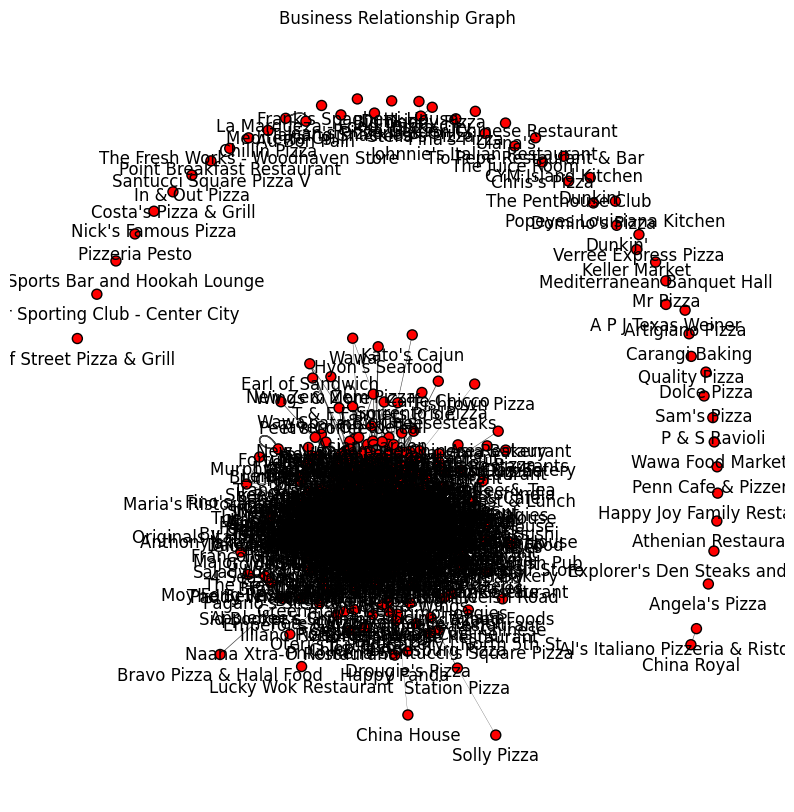

In [30]:
#The graph to be created,  visually represents how different businesses are related through user reviews. 
import matplotlib.pyplot as plt
from igraph import plot  # Ensure you have imported plot from igraph

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the business graph with the specified parameters
plot(
    business_graph_1,
    vertex_size=10,  # Adjust vertex size for better visibility
    edge_width=[weight / 10 for weight in business_graph_1.es["weight"]],  # Scale edge widths for better visibility
    vertex_label=business_graph_1.vs["name"],  # Use the names as labels
    target=ax
)

plt.title("Business Relationship Graph")  # Add a title for clarity
plt.show()  # Display the plot


In this graph, the nodes more in the center (lables on purpose to catch some restaurant's names) presents restaurants in Philadelphia with higher connectivity (Businesses like "Earl of Sandwich“). Means, many users who review one business also review this one, indicating its market popularity.The graph visually represents how different businesses are interconnected through user reviews. If two businesses have a strong connection (represented by a thicker edge), it indicates that they have been frequently reviewed by the same users. This can imply that they are either competitors, serve a similar audience, or are complementary in some way (e.g., a restaurant and a nearby café).

Potential Influencers:Central businesses here often serve as hubs in  network. May influence customer behavior, or be well-regarded by users, making them potential leaders in their restaurant’s categories.

Nonethless, Businesses like "Angela's Pizza" may indicate lower connectivity with other businesses in the network. This could imply that they attract a more niche audience or that fewer users overlap in their reviews with the center businesses.



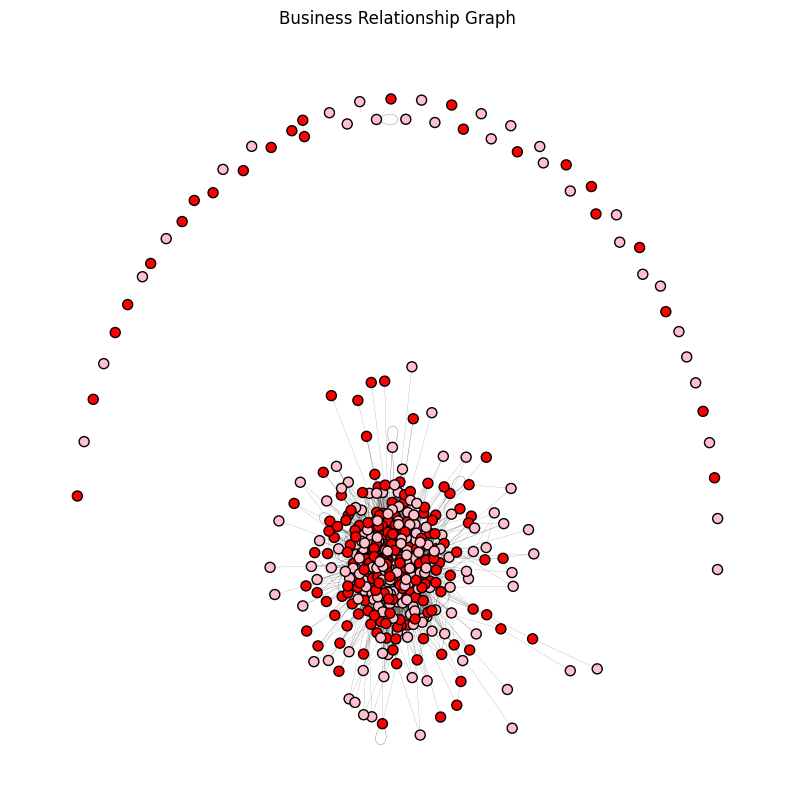

In [11]:
import matplotlib.pyplot as plt
from igraph import plot  # Ensure you have imported plot from igraph

# Assign default weights if 'weight' attribute is missing
if "weight" not in business_graph_1.es.attributes():
    business_graph_1.es["weight"] = [1] * len(business_graph_1.es)

# Define colors as a mix of red and pink for the vertices
colors = ['red' if i % 2 == 0 else 'pink' for i in range(len(business_graph_1.vs))]

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the business graph with red and pink colored vertices
plot(
    business_graph_1,
    vertex_size=10,  # Adjust vertex size for better visibility
    edge_width=[weight / 10 for weight in business_graph_1.es["weight"]],  # Scale edge widths for better visibility
    vertex_color=colors,  # Set vertex color to alternate between red and pink
    target=ax  # Plot to the Matplotlib axes
)

plt.title("Business Relationship Graph(random color attribution-another layout)")  # Add a title for clarity
plt.show()  # Display the plot


Top 10 Businesses by Centrality Measures:
                          Business Name  Degree Centrality  \
Dv6RfXLYe1atjgz3Xf4GGw       HipCityVeg           0.452747   
ctHjyadbDQAtUFfkcAFEHw            Zahav           0.443956   
EtKSTHV5Qx_Q7Aur9o4kQQ  Village Whiskey           0.439560   
Iw8uqNPxviwcgxtruAx_LA     Good Dog Bar           0.435165   
Oun4NN-u5yiHIxDqtJnxgA   Federal Donuts           0.426374   
S8ZFYEgMejpChID8tzKo9A            Amada           0.419780   
iUZEGx29miZObLd6_lt7Vg   Sabrina's Café           0.393407   
j-qtdD55OLfSqfsWuQTDJg             Parc           0.373626   
vUkiYPpbkMXA99WneLSGkQ      Banana Leaf           0.362637   
ZKPrXH_GNW_AtZ31tP3NmA   White Dog Cafe           0.347253   

                        Closeness Centrality  Betweenness Centrality  
Dv6RfXLYe1atjgz3Xf4GGw              0.620255                0.035169  
ctHjyadbDQAtUFfkcAFEHw              0.618508                0.026582  
EtKSTHV5Qx_Q7Aur9o4kQQ              0.619380                0.

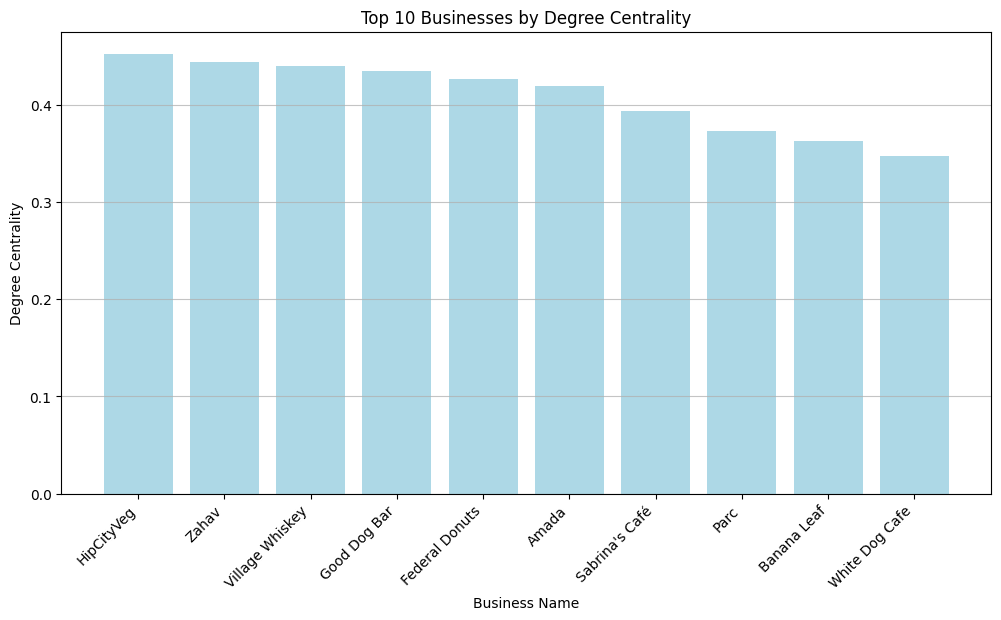

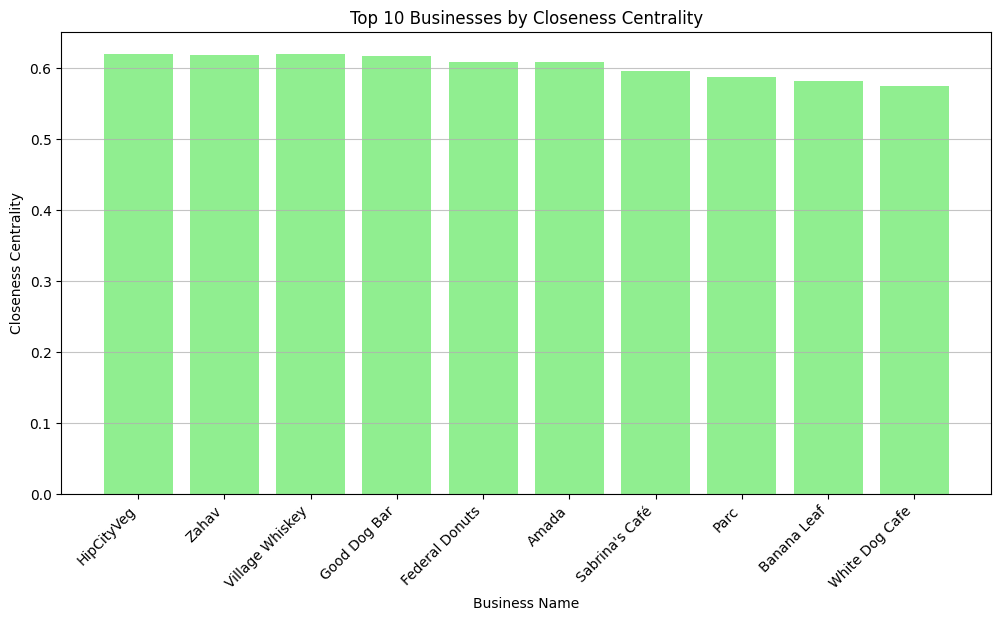

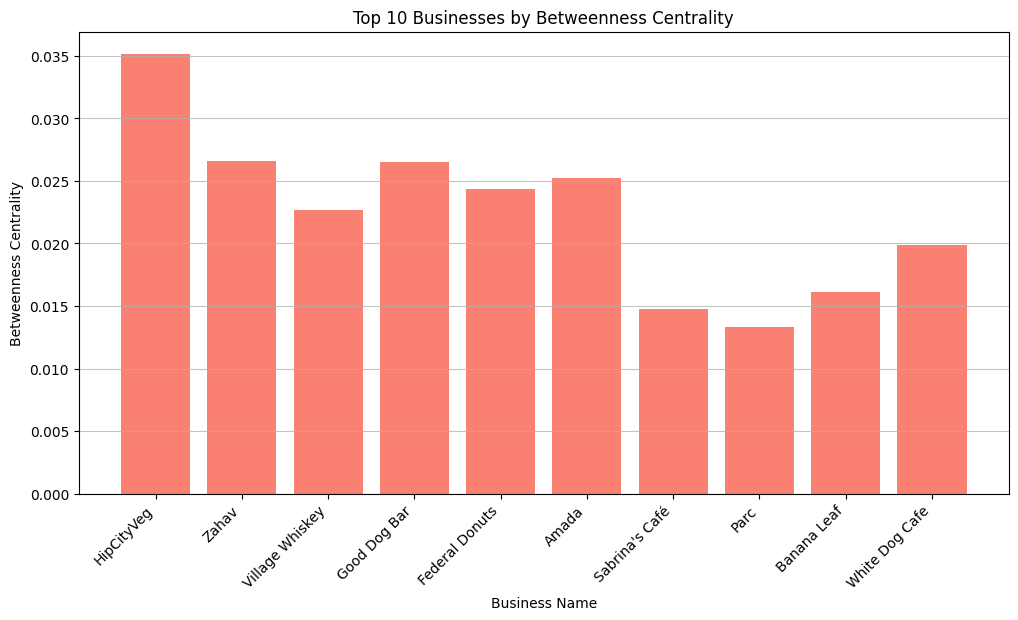

In [15]:
# Create a user-business mapping
user_business_df = df[['user_id', 'business_id']]

# Group by user_id to find which businesses each user has commented on
user_business_groups = user_business_df.groupby('user_id')['business_id'].apply(list)

# Create an empty graph for user projection
G = nx.Graph()

# Iterate through each user and their businesses
for businesses in user_business_groups:
    for i in range(len(businesses)):
        for j in range(i + 1, len(businesses)):
            # Add edges between businesses
            G.add_edge(businesses[i], businesses[j], weight=1)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Convert centrality measures to DataFrames for easier analysis
degree_centrality_df = pd.DataFrame.from_dict(degree_centrality, orient='index', columns=['Degree Centrality'])
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality, orient='index', columns=['Closeness Centrality'])
betweenness_centrality_df = pd.DataFrame.from_dict(betweenness_centrality, orient='index', columns=['Betweenness Centrality'])

# Combine all centrality measures into a single DataFrame
centrality_df = degree_centrality_df.join(closeness_centrality_df).join(betweenness_centrality_df)

# Sort the DataFrame by degree centrality
centrality_df = centrality_df.sort_values(by='Degree Centrality', ascending=False)

# Create a mapping from business_id to restaurant_name
business_id_to_name = df.set_index('business_id')['restaurant_name'].to_dict()

# Map the business IDs in the centrality_df to their corresponding names
centrality_df['Business Name'] = centrality_df.index.map(business_id_to_name)

# Display the top 10 businesses by degree centrality with their names
print("Top 10 Businesses by Centrality Measures:")
print(centrality_df[['Business Name', 'Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality']].head(10))

# Optional: Visualize centrality measures (e.g., Degree Centrality)
plt.figure(figsize=(12, 6))
plt.bar(centrality_df['Business Name'][:10], centrality_df['Degree Centrality'][:10], color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Businesses by Degree Centrality")
plt.xlabel("Business Name")
plt.ylabel("Degree Centrality")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Optional: Visualize Closeness Centrality
plt.figure(figsize=(12, 6))
plt.bar(centrality_df['Business Name'][:10], centrality_df['Closeness Centrality'][:10], color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Businesses by Closeness Centrality")
plt.xlabel("Business Name")
plt.ylabel("Closeness Centrality")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Optional: Visualize Betweenness Centrality
plt.figure(figsize=(12, 6))
plt.bar(centrality_df['Business Name'][:10], centrality_df['Betweenness Centrality'][:10], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Businesses by Betweenness Centrality")
plt.xlabel("Business Name")
plt.ylabel("Betweenness Centrality")
plt.grid(axis='y', alpha=0.75)
plt.show()


GRAPH WITH BLUE BARS: Degree Centrality in Philadelphia Restaurants
 A node with a high degree centrality is considered more influential or important in the network because it has more direct connections. For example, in a business network, a restaurant that is connected to many other restaurants (through users who have reviewed multiple restaurants) would have high degree centrality. This could indicate popularity or strong ties to the community.


GRAPH WITH GREEN BARS: Closeness Centrality in Philadelphia Restaurants
Measures how close a restaurant is to all other restaurants in the network. 

Restaurants with high closeness centrality can be seen as being more accessible or well-known across a wide range of other restaurants, meaning they can quickly be compared to or reviewed alongside other places.

GRAPH WITH ORANGE BARS: Betweenness Centrality in Philadelphia Restaurants
Identifies restaurants that frequently lie on the shortest paths between other restaurants.
Restaurants with high betweenness centrality might be those that bridge different "clusters" of the dining scene in Philadelphia.
For example, a restaurant that is commonly compared with restaurants from different neighborhoods or cuisines like Good Dog Bar and White Dog Café, may act as a "bridge" between various culinary communities. These restaurants control the flow of information (reviews), making them crucial in the network.


FOCUS: COMMUNITIES/CLUSTERS

In [5]:
# List of businesses you want to check
businesses = [
    "HipCityWeg", "Zahav", "Village Wiskey", "Good Dog Bar", 
    "Federal Donuts", "Amada", "Sabrina's Café", "Parc", 
    "Banana Leaf", "White Dog Cafe"
]

# Filtering the DataFrame for the specified businesses and retrieving their categories
business_info = df[df['restaurant_name'].isin(businesses)][['restaurant_name', 'categories']]

# Display the results
print("Categories for the specified businesses:")
print(business_info)

Categories for the specified businesses:
     restaurant_name                                         categories
1807  Federal Donuts  Restaurants, Korean, American (Traditional), B...
1808  Federal Donuts  Restaurants, Korean, American (Traditional), B...
1809  Federal Donuts  Restaurants, Korean, American (Traditional), B...
1810  Federal Donuts  Restaurants, Korean, American (Traditional), B...
1811  Federal Donuts  Restaurants, Korean, American (Traditional), B...
...              ...                                                ...
9546  White Dog Cafe  Cocktail Bars, Gluten-Free, Bars, Diners, Vege...
9547  White Dog Cafe  Cocktail Bars, Gluten-Free, Bars, Diners, Vege...
9548  White Dog Cafe  Cocktail Bars, Gluten-Free, Bars, Diners, Vege...
9549  White Dog Cafe  Cocktail Bars, Gluten-Free, Bars, Diners, Vege...
9550  White Dog Cafe  Cocktail Bars, Gluten-Free, Bars, Diners, Vege...

[1190 rows x 2 columns]


To check, in each categories, our top 10 restaurants has as categories (just some cases to have an ideia for if we choose a category of restaurant type inside a community or not). 
Note: Later, eventhough we found a interesting exercice to study the categories inside a community, since data was spars, we decide to study all the community make the exercice more challenging but interesting in data and market terms.

In [70]:
# Print out the top 5 users by degree centrality
top_users_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 users by degree centrality:", top_users_by_degree)

Top 5 users by degree centrality: [('9Bq09meTAggWpjIsier7iQ', 0.32662721893491126), ('Cf8Jw9yX8RrG-l4PQoMkuw', 0.26052409129332205), ('HxyLRaoH9PS09M6R3rV-EQ', 0.22958579881656804), ('IKbjLnfBQtEyVzEu8CuOLg', 0.21487743026204564), ('VEj1OuO6QrQMXFhuMZJ8cQ', 0.20676246830092984)]


 Analyzing the degree centrality of users can provide insights into user behavior. For example, if a user has reviewed many restaurants, they might be a food enthusiast, which can inform businesses about potential customer segments.

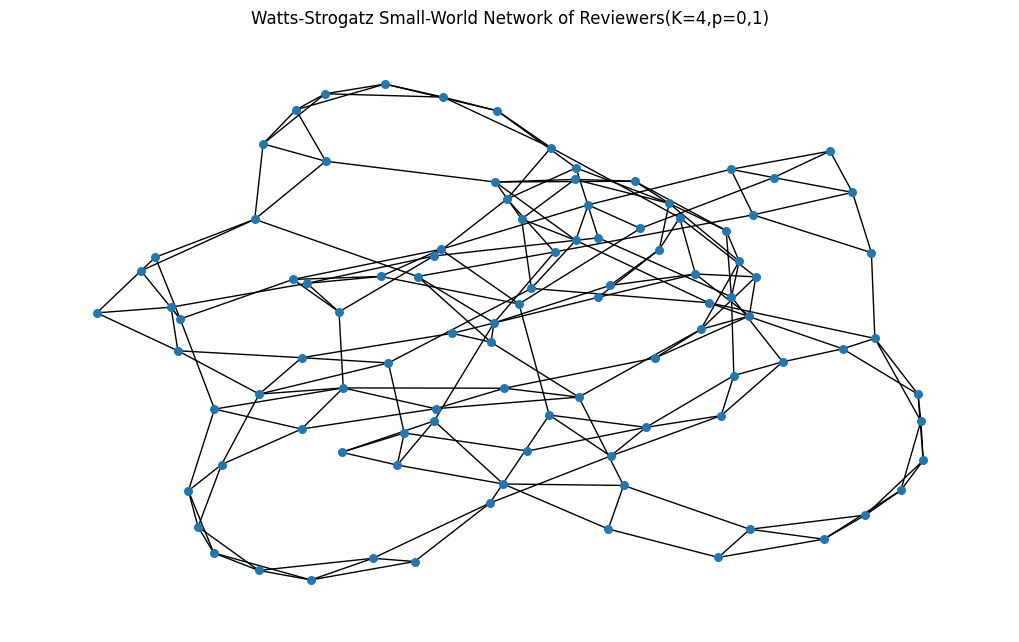

In [30]:
# Create a small-world network from scratch
num_nodes = 100  # Specify number of nodes
k = 4            # Each node is connected to k nearest neighbors
p = 0.1          # Probability of rewiring edges

# Create a small-world network using the Watts-Strogatz model
small_world_graph = nx.watts_strogatz_graph(num_nodes, k, p)

# Visualizing the small-world network
plt.figure(figsize=(10, 6))
nx.draw(small_world_graph, node_size=30, with_labels=False)
plt.title('Watts-Strogatz Small-World Network of Reviewers(K=4,p=0,1)')
plt.show()


 This present graph represents a small-world network using the Watts-Strogatz model. In practice, this type of network we used to simulate and analyze complex systems where nodes  are connected in a way that reflects both local and long-range interactions.

In [28]:
# Community Detection:We can identify clusters or communities within the network using algorithms like the Girvan-Newman method
#Note:The algorithm identifies edges with high betweenness centrality and removes them iteratively.
# Girvan-Newman community detection
from networkx.algorithms.community import girvan_newman

# Apply Girvan-Newman algorithm to detect communities
communities = girvan_newman(G)

# Get first level of communities
first_community = tuple(sorted(c) for c in next(communities))

# Display the first two detected communities
print("First community detected:", first_community[0][:5])
print("Second community detected:", first_community[1][:5])


First community detected: ['-ATiAtTikuGuqvaW2O6tNA', '-CRjqZ4GxZ6lIa_qMj7-yw', '-OIUunijjcq_ZzyyQhPPFQ', '-UJ7ZTb3zfmqZogmy3fnGg', '-mIlmp5l4hKlp1tvHRdvTg']
Second community detected: ['57bce3hS4snqOknTfsiMKw', 'ipaHtb0jzsnzuxkjQxvxgQ']


For example, The first community is larger and consists of five nodes, indicating a stronger or more complex interaction among these entities.
The second community is smaller, containing only two nodes. This suggests a tighter or more exclusive connection between these two entities, possibly indicating a niche or specialized relationship.


Category: Halal, Pakistani, Restaurants, Indian
  Community 0: ['kxX2SOes4o-D3ZQBkiMRfA']

Category: Burgers, Vegetarian, Restaurants, Vegan
  Community 0: ['Dv6RfXLYe1atjgz3Xf4GGw']

Category: Spanish, Restaurants, Breakfast & Brunch, Tapas Bars, Iberian
  Community 0: ['S8ZFYEgMejpChID8tzKo9A']

Category: Coffee & Tea, Beauty & Spas, Cosmetics & Beauty Supply, Shopping, Arts & Crafts, Costumes, Restaurants, Vietnamese, Food
  Community 0: ['IjMs1n7UelI7ev_5IDl5kA']

Category: French, Spanish, Tapas Bars, Cafes, Restaurants, Wine Bars, Modern European, Bars, Nightlife, Italian, Comedy Clubs, Greek, American (New)
  Community 0: ['eJaeTZlIdM3HWCq__Ve4Wg']

Category: Noodles, Seafood, Restaurants, Chinese
  Community 0: ['bq0n3CQy1CkE_WUe76zQvg']

Category: Smokehouse, Barbeque, Food, Restaurants, Buffets
  Community 0: ['_UOg5_pk9IhKee91eWrT4A']

Category: Bakeries, Breakfast & Brunch, Delis, Restaurants, Food, Sandwiches, Desserts
  Community 0: ['03jQGGJ2ch0uHTtW-UUUqg']

Category: 

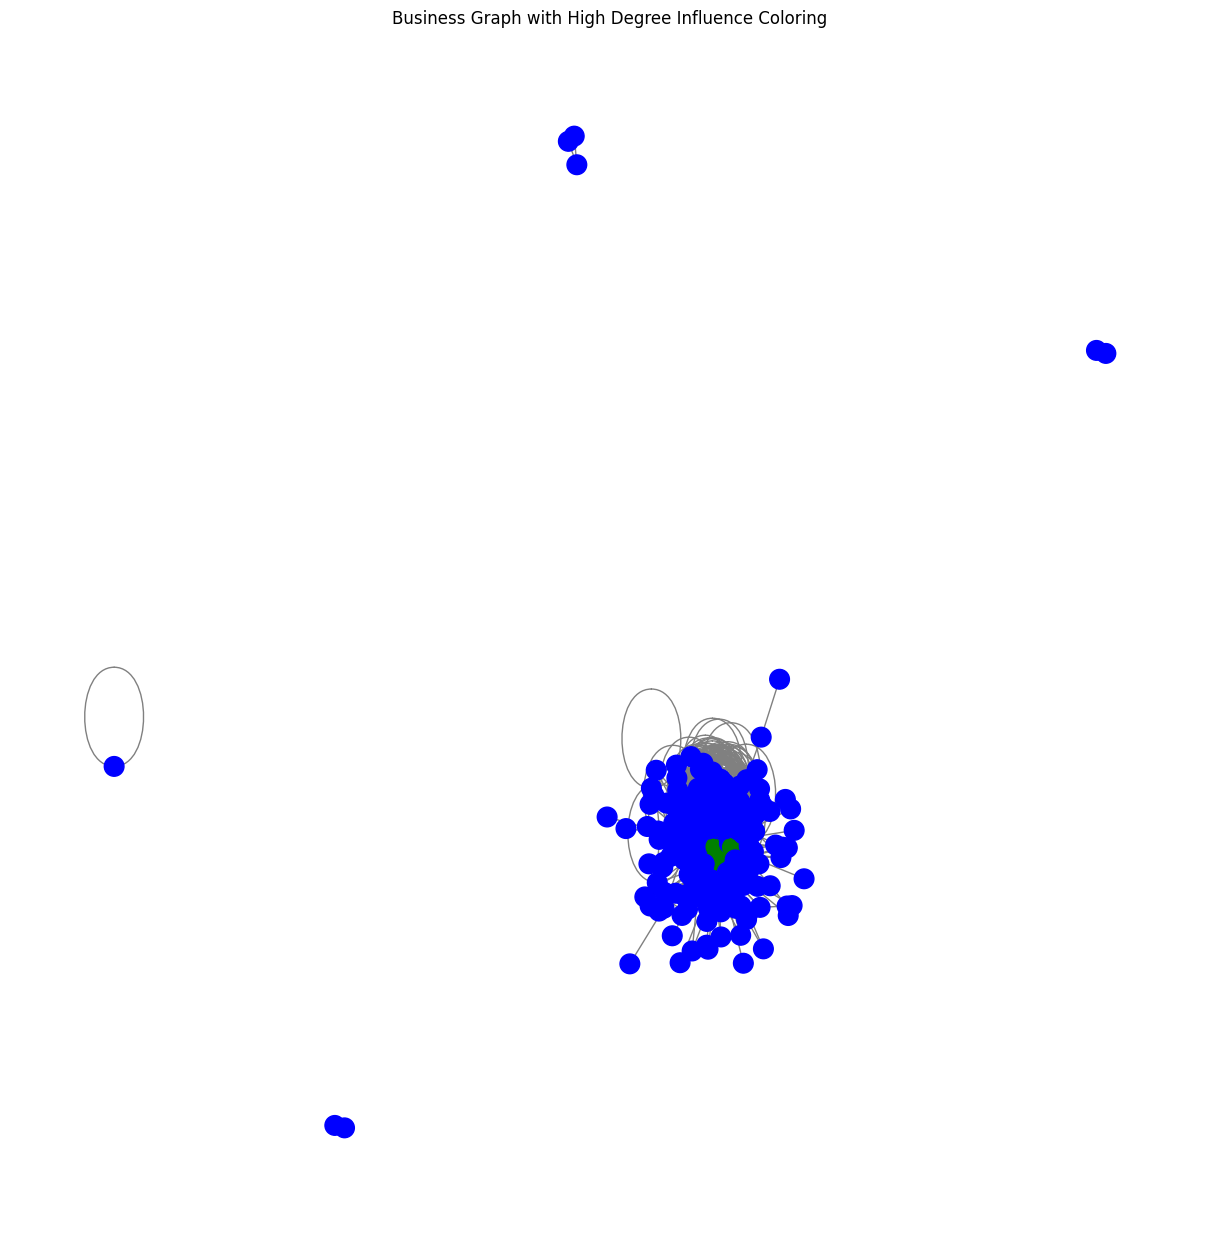

In [20]:
# Step 1: Create the business-user graph
G = nx.Graph()

# Assuming df has 'user_id', 'business_id', and 'categories' columns
for user in df.user_id.unique():
    user_reviews = df[df.user_id == user]
    business_ids = user_reviews.business_id.tolist()
    
    # Create edges between all combinations of businesses reviewed by the same user
    for business_pair in combinations(business_ids, 2):
        G.add_edge(business_pair[0], business_pair[1])

# Step 2: Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Store centrality in the graph nodes
for node in G.nodes:
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['eigenvector_centrality'] = eigenvector_centrality[node]

# Step 3: Community Detection using Girvan-Newman
communities = girvan_newman(G)
first_communities = list(next(communities))

# Get community assignments
community_assignments = {}
for i, community in enumerate(first_communities):
    for node in community:
        community_assignments[node] = i

# Step 4: Group businesses by category
category_communities = {}
for business_id in G.nodes:
    # Get the category of the business from the DataFrame
    categories = df.loc[df.business_id == business_id, 'categories'].values
    if categories.size > 0:
        category = categories[0]  # Assuming one category per business for simplicity
        if category not in category_communities:
            category_communities[category] = {}
        if community_assignments[business_id] not in category_communities[category]:
            category_communities[category][community_assignments[business_id]] = []
        category_communities[category][community_assignments[business_id]].append(business_id)

# Step 5: Print and visualize results
for category, communities in category_communities.items():
    print(f"\nCategory: {category}")
    for comm_id, businesses in communities.items():
        print(f"  Community {comm_id}: {businesses}")

# Visualize the graph with color coding by centrality
plt.figure(figsize=(12, 12))

# Create color mapping based on degree centrality
node_colors = []
for node in G.nodes:
    centrality = G.nodes[node]['degree_centrality']
    if centrality > 0.1:  # Example threshold
        node_colors.append('green')  # High influence
    else:
        node_colors.append('blue')  # Lower influence

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', node_size=200, font_size=8)

plt.title("Business Graph with High Degree Influence Coloring")
plt.show()

In this graph, if User A reviewed Business Restaurant 1 and Business Restaurant 2, an edge is added between those two businesses in the graph. This helps to visualize connections based on user behavior.


Businesses in Communities Sorted by Betweenness Centrality:

Community 0 (Avg Betweenness: 0.0026):
  Category: Halal, Pakistani, Restaurants, Indian - Businesses: ['kxX2SOes4o-D3ZQBkiMRfA']
  Category: Burgers, Vegetarian, Restaurants, Vegan - Businesses: ['Dv6RfXLYe1atjgz3Xf4GGw']
  Category: Spanish, Restaurants, Breakfast & Brunch, Tapas Bars, Iberian - Businesses: ['S8ZFYEgMejpChID8tzKo9A']
  Category: Coffee & Tea, Beauty & Spas, Cosmetics & Beauty Supply, Shopping, Arts & Crafts, Costumes, Restaurants, Vietnamese, Food - Businesses: ['IjMs1n7UelI7ev_5IDl5kA']
  Category: French, Spanish, Tapas Bars, Cafes, Restaurants, Wine Bars, Modern European, Bars, Nightlife, Italian, Comedy Clubs, Greek, American (New) - Businesses: ['eJaeTZlIdM3HWCq__Ve4Wg']
  Category: Noodles, Seafood, Restaurants, Chinese - Businesses: ['bq0n3CQy1CkE_WUe76zQvg']
  Category: Smokehouse, Barbeque, Food, Restaurants, Buffets - Businesses: ['_UOg5_pk9IhKee91eWrT4A']
  Category: Bakeries, Breakfast & Brunch

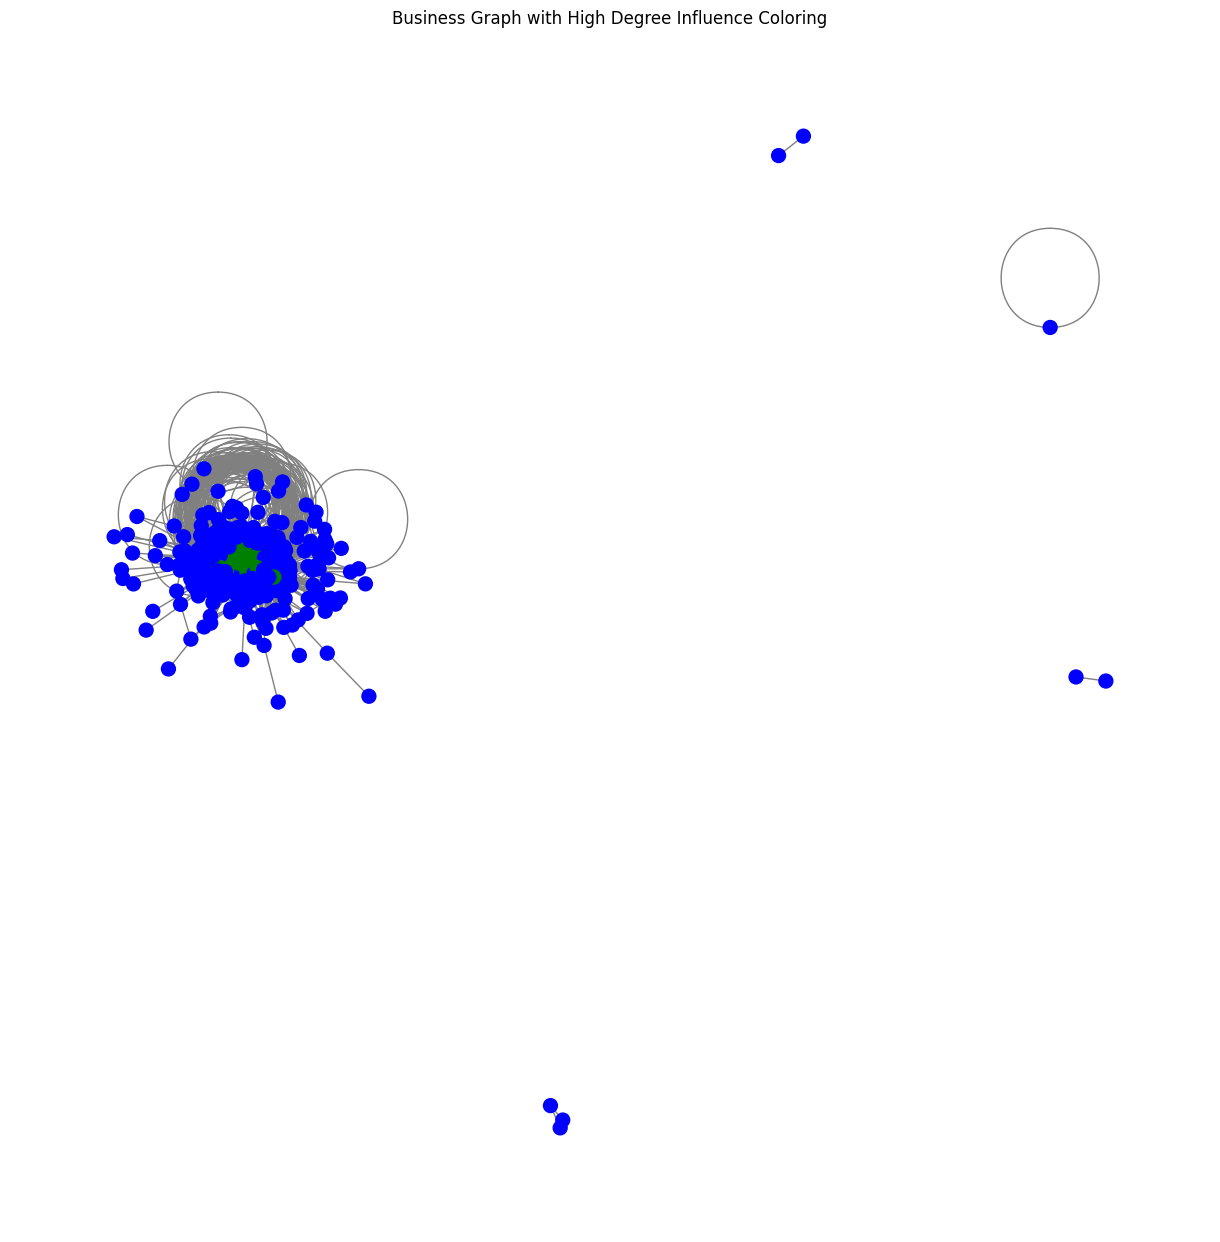

In [32]:
# Step 2: Create the business-user graph
G = nx.Graph()

# Assuming df has 'user_id', 'business_id', and 'categories' columns
for user in df.user_id.unique():
    user_reviews = df[df.user_id == user]
    business_ids = user_reviews.business_id.tolist()
    
    # Create edges between all combinations of businesses reviewed by the same user
    for business_pair in combinations(business_ids, 2):
        G.add_edge(business_pair[0], business_pair[1])

# Step 3: Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Store centrality in the graph nodes
for node in G.nodes:
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['eigenvector_centrality'] = eigenvector_centrality[node]

# Step 4: Community Detection using Girvan-Newman
communities = girvan_newman(G)
first_communities = list(next(communities))

# Get community assignments
community_assignments = {}
for i, community in enumerate(first_communities):
    for node in community:
        community_assignments[node] = i

# Step 5: Group businesses by category and calculate average betweenness
category_communities = {}
community_betweenness = {}

for business_id in G.nodes:
    # Get the category of the business from the DataFrame
    categories = df.loc[df.business_id == business_id, 'categories'].values
    if categories.size > 0:
        category = categories[0]  # Assuming one category per business for simplicity
        comm_id = community_assignments[business_id]
        
        # Add business to category-communities mapping
        if category not in category_communities:
            category_communities[category] = {}
        if comm_id not in category_communities[category]:
            category_communities[category][comm_id] = []
        category_communities[category][comm_id].append(business_id)

        # Calculate average betweenness centrality for this community
        if comm_id not in community_betweenness:
            community_betweenness[comm_id] = []
        community_betweenness[comm_id].append(G.nodes[business_id]['betweenness_centrality'])

# Calculate average betweenness centrality for each community
average_betweenness = {comm_id: sum(betweenness) / len(betweenness) for comm_id, betweenness in community_betweenness.items()}

# Sort communities by average betweenness centrality (descending)
sorted_communities = sorted(average_betweenness.items(), key=lambda x: x[1], reverse=True)

# Step 6: Print businesses in each community by category, sorted by betweenness centrality
print("\nBusinesses in Communities Sorted by Betweenness Centrality:")
for comm_id, avg_bet in sorted_communities:
    print(f"\nCommunity {comm_id} (Avg Betweenness: {avg_bet:.4f}):")
    for category, communities in category_communities.items():
        if comm_id in communities:
            print(f"  Category: {category} - Businesses: {communities[comm_id]}")

# Step 7: Visualize the graph with color coding by centrality
plt.figure(figsize=(12, 12))

# Create color mapping based on degree centrality
node_colors = []
for node in G.nodes:
    centrality = G.nodes[node]['degree_centrality']
    if centrality > 0.1:  # Example threshold
        node_colors.append('green')  # High influence
    else:
        node_colors.append('blue')  # Lower influence

# Position the nodes using spring layout
pos = nx.spring_layout(G)

# Draw the graph with smaller nodes and without labels
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color='gray', node_size=100, font_size=8)  # Adjusted node_size to 100

plt.title("Business Graph with High Degree Influence Coloring")
plt.show()

We have the communities clustered
Note:The grey lines are the edges connecting the Restaurants nodes.

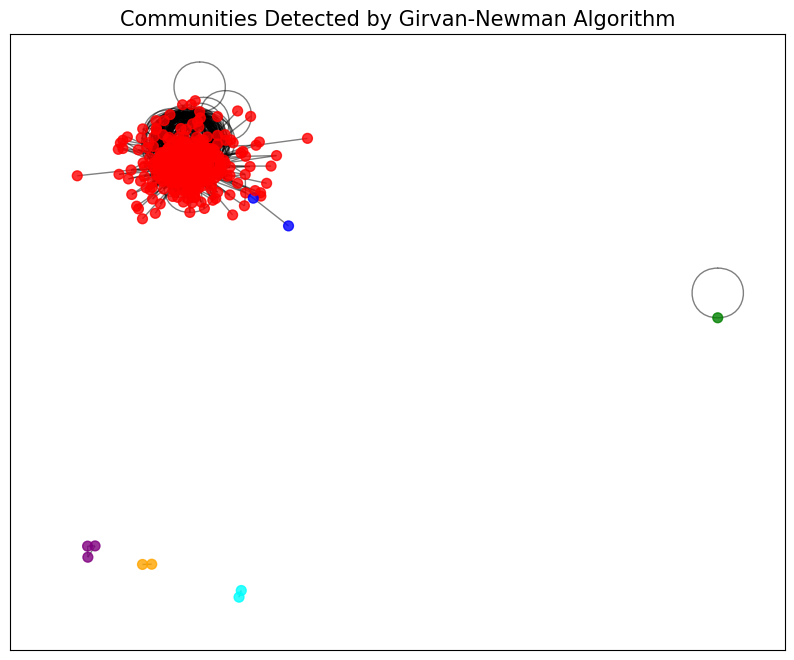

In [43]:
#Use of other layout, color karate club graph
# Example graph (use your G network instead)
# G = nx.karate_club_graph()  # Replace with your actual graph if different

# Apply the Girvan-Newman algorithm to detect communities
communities = girvan_newman(G)

# Get the first level of detected communities
first_community = tuple(sorted(c) for c in next(communities))

# Create a color map for the nodes
color_map = {}
colors = itertools.cycle(['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'yellow'])  # You can add more colors

for community in first_community:
    color = next(colors)
    for node in community:
        color_map[node] = color

# Draw the graph with colored nodes based on their community
plt.figure(figsize=(10, 8))

# Draw the graph with community colors
pos = nx.spring_layout(G)  # Layout for positioning the nodes

# Draw nodes with smaller size and colors based on community
nx.draw_networkx_nodes(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=50, alpha=0.8)

# Draw the edges of the graph
nx.draw_networkx_edges(G, pos, alpha=0.5)

# No labels to be drawn
# Display the graph
plt.title("Communities Detected by Girvan-Newman Algorithm", fontsize=15)
plt.show()


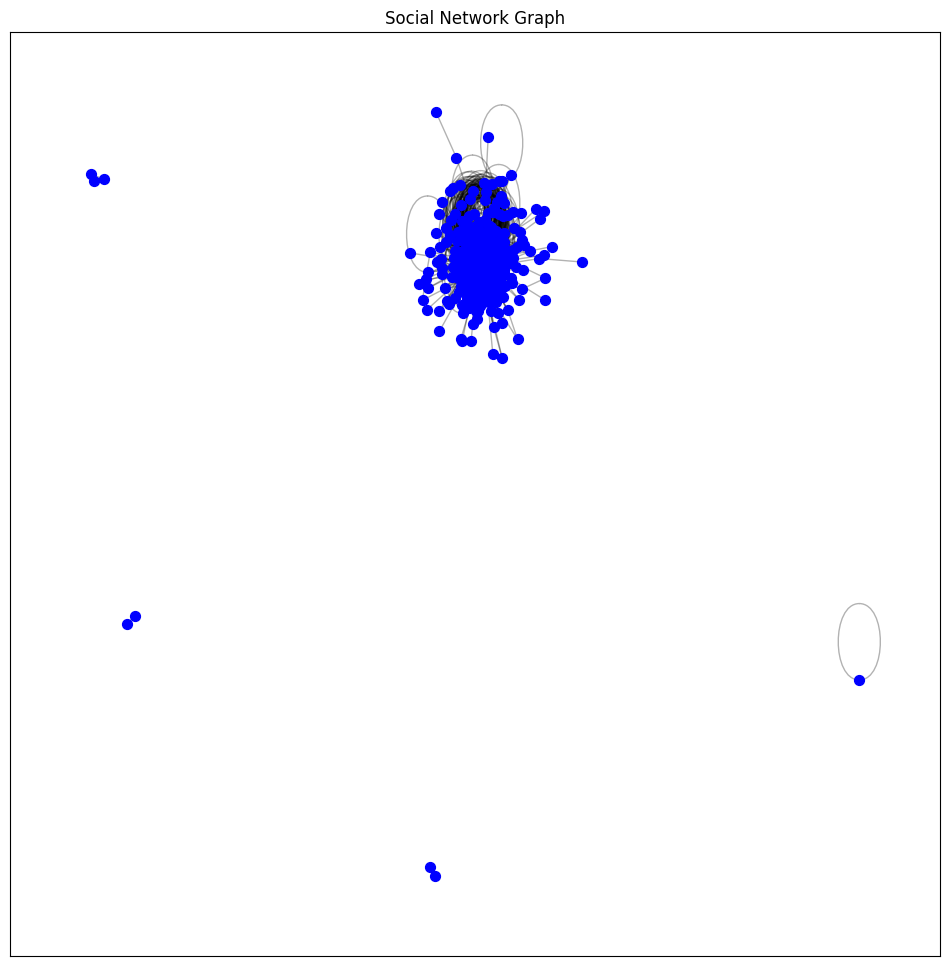

In [44]:
 #Graph Visualization:Visualize the social network graph using matplotlib.
# Set the plot size
plt.figure(figsize=(12, 12))

# Draw the graph with a spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title('Social Network Graph')
plt.show()
#Note: Beter layout for the edges but the same concept of the previous 2 graphs

Focus: Network and Node-main characteristics

In [61]:

# Assuming edges_with_weights_1 is in the correct format, create the DataFrame
edges_1 = pd.DataFrame(edges_with_weights_1, columns=['from', 'to', 'weights'])

# Display the DataFrame
print(edges_1)


       from   to  weights
0         0   10      4.0
1         0   19      3.0
2         0   39      3.0
3         0  168      4.0
4         0  175      3.0
...     ...  ...      ...
10330   493  500      3.0
10331   495  496      7.0
10332   495  499      9.0
10333   495  500      4.0
10334   496  496     10.0

[10335 rows x 3 columns]


In [ ]:
To create a DataFrame from a list of edges with associated weights, which typically represent connections in a graph or network. 

In [62]:
edges_1.head()

from   to  weights
0     0   10      4.0
1     0   19      3.0
2     0   39      3.0
3     0  168      4.0
4     0  175      3.0

In [63]:
edges_1.groupby(["from","to", "weights"]).size()

from  to   weights
0     10   4.0        1
      19   3.0        1
      39   3.0        1
      168  4.0        1
      175  3.0        1
                     ..
493   500  3.0        1
495   496  7.0        1
      499  9.0        1
      500  4.0        1
496   496  10.0       1
Length: 10335, dtype: int64

To create a DataFrame from a list of edges with associated weights, which typically represent connections in a graph or network. 

In [7]:
# connections
print(business_graph_1)

Graph with 4 nodes and 3 edges


In [79]:
# df = pd.DataFrame(columns=["Metric type", "Density", "Undirected diameter", "Weighted undirected diameter"])

# Create a weighted undirected graph from the adjacency matrix
business_graph_1 = Graph.Weighted_Adjacency(adj_matrix_1.tolist(), mode='UNDIRECTED')

# Assign names and IDs to each vertex in the graph
for i in range(len(business_dict)):
    index_i_b1 = df.business_id == business_dict_inv[i]
    # Ensure to handle potential empty values
    restaurant_name = df.loc[index_i_b1, 'restaurant_name'].values
    business_graph_1.vs[i]["name"] = restaurant_name[0] if len(restaurant_name) > 0 else None
    business_graph_1.vs[i]["id"] = business_dict_inv[i]

# Density Calculation
edge_density_1 = business_graph_1.density(loops=False)

# Create a DataFrame for density data
density_data = pd.DataFrame({
    "Metric type": ["Density"],
    "Density": [edge_density_1]
})

# Append density metric to the existing DataFrame 'df'
df = pd.concat([df, density_data], ignore_index=True)

# Diameter Calculation
diameter_undirected_1 = business_graph_1.diameter(directed=False, weights=None)
print(f"Undirected diameter: {diameter_undirected_1}")

diameter_weighted_1 = business_graph_1.diameter(directed=False, weights="weight")
print(f"Weighted undirected diameter: {diameter_weighted_1}")

# Create a DataFrame for diameter data
diameter_data = pd.DataFrame({
    "Metric type": ["Diameter"],
    "Undirected diameter": [diameter_undirected_1],
    "Weighted undirected diameter": [diameter_weighted_1]
})

# Append diameter metrics to the existing DataFrame 'df'
df = pd.concat([df, diameter_data], ignore_index=True)

# Display the updated DataFrame
print("Updated DataFrame:")
print(df)


Undirected diameter: 6
Weighted undirected diameter: 23.0
Updated DataFrame:
                    review_id                 user_id             business_id  \
0      TdmWqB-77Lirm-XgA4JJ4A  3fTw9hmzlbMK2Q32Q-a4Hw  kxX2SOes4o-D3ZQBkiMRfA   
1      05VCJQ6DuYW8rw1gpBGG9w  c4rYJcGZ0gRl-C6SqbehQQ  kxX2SOes4o-D3ZQBkiMRfA   
2      Up0DIF2JNsIwSkBh2mSl0w  EMMKdK1cGrLSo08wgSYHJQ  kxX2SOes4o-D3ZQBkiMRfA   
3      e8loVKkBln321zORmRqoUw  fbV1aq9ASXggQyGTNN-hzg  kxX2SOes4o-D3ZQBkiMRfA   
4      3G6pKVA4cHtT4F6V_dl5Rw  TeLcAcuphfDfg-lgehu2qg  kxX2SOes4o-D3ZQBkiMRfA   
...                       ...                     ...                     ...   
10404  20ZYS5alWclEjaXhyjgYRQ  UQIERttr5tWwid4TncXLvw  7pwZZVVlYCxQvVdd8Q03wg   
10405  RjocZKvoVVCgw4lBkO3CPA  ygvP779WApkVWlHiamB_Uw  7pwZZVVlYCxQvVdd8Q03wg   
10406  3HhZYnoSBnSki7o2V33VLQ  yIsQ4qFCyY-clmlRwQlw_w  7pwZZVVlYCxQvVdd8Q03wg   
10407                     NaN                     NaN                     NaN   
10408                     NaN   

Key Metrics:
Undirected Diameter: 6

This indicates that the longest shortest path (the maximum distance between any two nodes) in the graph is 6. This can reflect the number of edges in that longest path, indicating how far apart the most distant businesses are from each other in terms of direct relationships.
Weighted Undirected Diameter: 23.0

This value takes into account the weights of the edges. The longest path considering the weights (which could represent distance or strength of connection) is 23.0. This suggests that the most distant pair of businesses, when considering the weight of connections, is 23.0 units apart.
Density: 0.082515

This density value shows the proportion of actual edges in the graph compared to the maximum possible edges. A low density may indicate a sparse graph, where not all businesses are connected to each other.

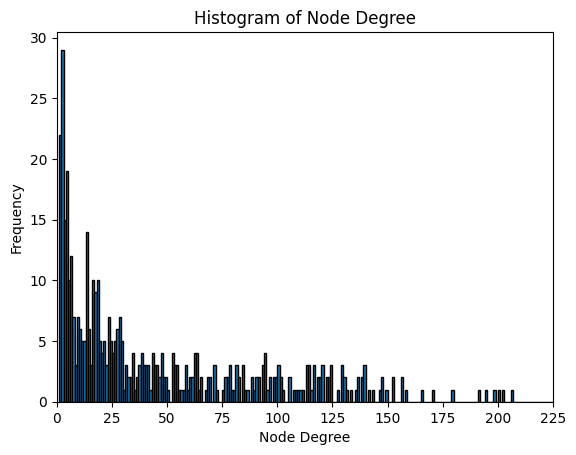

In [89]:
# Check the distribution of the degrees
ax = plt.hist(deg_1, bins=range(1, business_graph_1.vcount()), edgecolor='black')
plt.title("Histogram of Node Degree")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")

# Set x-axis limit to 225
plt.xlim(0, 225)

plt.show()

In [90]:
# Closeness: proximity of a node to all other nodes in a network.
# Inverse of the node’s average geodesic distance to others in the network.
# Can also be calculated with weights

# Calculate closeness centrality for the business graph
closeness_1 = business_graph_1.closeness(mode="ALL", weights=None)

# Create a DataFrame with <node, closeness> pairs
close_1 = pd.DataFrame({"name": business_graph_1.vs["name"], "closeness": closeness_1}).sort_values("closeness", ascending=False)

# Clean up restaurant names by removing any unwanted characters
close_1['name'] = close_1['name'].str.replace('\n\n', '', regex=False)  # Use regex=False to avoid warnings

# Display the closeness DataFrame
close_1


name  closeness
449                 Verree Express Pizza        1.0
146  Al's Italiano Pizzeria & Ristorante        1.0
279                          China Royal        1.0
297                        Keller Market        1.0
224                      Big Daddy Pizza        1.0
..                                   ...        ...
459                    Taijiang Snackies        NaN
461           Point Breakfast Restaurant        NaN
463                             Mr Pizza        NaN
464              Santucci Square Pizza V        NaN
465                              Ulana's        NaN

[501 rows x 2 columns]

High Closeness Values:

The top rows of the DataFrame show businesses with a closeness value of 1.0. This indicates that these businesses are very close to all other businesses in the network, meaning they are likely well-connected or strategically positioned to reach other businesses quickly.
For example, if Verree Express Pizza, Al's Italiano Pizzeria & Ristorante, and others all have a closeness value of 1.0, they might have the shortest average distance to other businesses, making them central in terms of connectivity.
NaN Values:

Businesses like Taijiang Snackies, Point Breakfast Restaurant, Mr Pizza, Santucci Square Pizza V, and Ulana's have NaN (Not a Number) values for closeness. This typically means that these businesses are either isolated (not connected to any other businesses) or there are no valid paths to calculate their average distances. In graph terms, they might be in disconnected components of the network or have no incoming or outgoing edges.

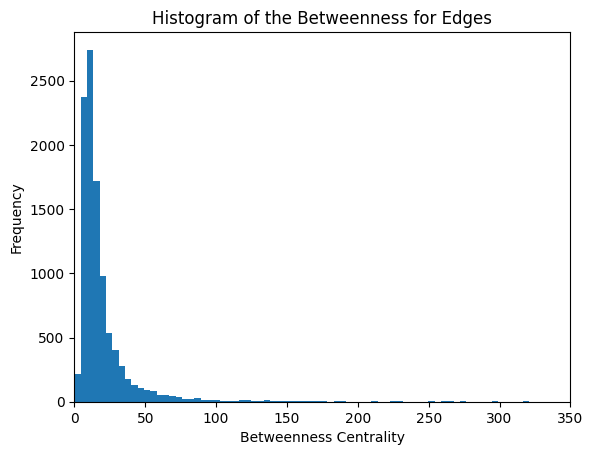

In [92]:
# Calculate the betweenness for edges
# Measures the importance of edges in facilitating the flow of information between nodes.
edge_betweenness_1 = business_graph_1.edge_betweenness(directed=True, weights=None)

# Check the distribution of the betweenness for edges
ax = plt.hist(edge_betweenness_1, bins=200)
plt.title("Histogram of the Betweenness for Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.xlim(0, 350)  # Limit x-axis to 300 for better visualization
plt.show()  # Show the plot


In [97]:

# Average path length: the mean of the shortest distance between each pair of nodes in the network.
mean_dist_undirected_1 = business_graph_1.average_path_length(directed=False)
print(f"Average path length (undirected) = {mean_dist_undirected_1:.3f}")

# Prepare the average path length data as a DataFrame
average_path_length_data = pd.DataFrame({
    "Metric type": ["Average Path Length"],
    "Average path length": [mean_dist_undirected_1]
})

# Concatenate the new data with the existing DataFrame 'df'
df = pd.concat([df, average_path_length_data], ignore_index=True)

# Optionally display the updated DataFrame
print("Updated DataFrame with Average Path Length:")
print(df)


Average path length (undirected) = 2.211
Updated DataFrame with Average Path Length:
                    review_id                 user_id             business_id  \
0      TdmWqB-77Lirm-XgA4JJ4A  3fTw9hmzlbMK2Q32Q-a4Hw  kxX2SOes4o-D3ZQBkiMRfA   
1      05VCJQ6DuYW8rw1gpBGG9w  c4rYJcGZ0gRl-C6SqbehQQ  kxX2SOes4o-D3ZQBkiMRfA   
2      Up0DIF2JNsIwSkBh2mSl0w  EMMKdK1cGrLSo08wgSYHJQ  kxX2SOes4o-D3ZQBkiMRfA   
3      e8loVKkBln321zORmRqoUw  fbV1aq9ASXggQyGTNN-hzg  kxX2SOes4o-D3ZQBkiMRfA   
4      3G6pKVA4cHtT4F6V_dl5Rw  TeLcAcuphfDfg-lgehu2qg  kxX2SOes4o-D3ZQBkiMRfA   
...                       ...                     ...                     ...   
10911                     NaN                     NaN                     NaN   
10912                     NaN                     NaN                     NaN   
10913                     NaN                     NaN                     NaN   
10914                     NaN                     NaN                     NaN   
10915                   

In [103]:
# Assuming 'business_graph_1' is igraph Graph object
# For demonstration, create a sample graph (replace this with your actual graph)
business_graph_1 = ig.Graph.Erdos_Renyi(n=20, m=50)  # Example graph with 20 nodes and 50 edges

# Community detection based on edge betweenness (Newman-Girvan)
communities_1 = business_graph_1.community_edge_betweenness()
communities_1 = communities_1.as_clustering()  # Convert to clustering object for ease of use

# Count the number of communities detected
num_communities_1 = len(communities_1)
print(f"Number of communities detected (Edge Betweenness): {num_communities_1}")

# Create a color palette for the communities
palette_1 = [plt.cm.viridis(i / num_communities_1) for i in range(num_communities_1)]

# Coloring the nodes based on the community they belong to
for i, community in enumerate(communities_1):
    for vertex in community:
        business_graph_1.vs[vertex]["color"] = palette_1[i]  # Assign a color from the palette

# Calculate closeness centrality for each vertex
closeness_scores = business_graph_1.closeness()
closeness_df = pd.DataFrame(closeness_scores, columns=['closeness'])

# Selecting the highest and lowest closeness nodes
close_1 = closeness_df.sort_values(by='closeness', ascending=False)  # Sort by closeness centrality
close_selection_1 = close_1.reset_index(drop=True).loc[[0, close_1.shape[0]-1]]  # Select the top and bottom

# Display the selection of the highest and lowest closeness nodes
print("Highest and lowest closeness centrality nodes:")
print(close_selection_1)

Number of communities detected (Edge Betweenness): 8
Highest and lowest closeness centrality nodes:
    closeness
0    0.655172
19   0.395833


In [107]:
import igraph as ig
import pandas as pd

# Assuming 'business_graph_1' is igraph Graph object
# For demonstration, create a sample graph (replace this with your actual graph)
business_graph_1 = ig.Graph.Erdos_Renyi(n=20, m=50)  # Example graph with 20 nodes and 50 edges

# Set default names as vertex indices if not already set
if 'name' not in business_graph_1.vs.attributes():
    business_graph_1.vs['name'] = [str(i) for i in range(business_graph_1.vcount())]

# Calculate closeness centrality for each vertex
closeness_scores = business_graph_1.closeness()
closeness_df = pd.DataFrame(closeness_scores, columns=['closeness'])
closeness_df['name'] = business_graph_1.vs['name']  # Add names or IDs to closeness DataFrame

# Sort by closeness and select the highest and lowest closeness nodes
close_1 = closeness_df.sort_values(by='closeness', ascending=False).reset_index(drop=True)
close_selection_1 = close_1.loc[[0, close_1.shape[0] - 1]]  # Select highest and lowest closeness nodes

# Calculate betweenness centrality for each vertex
betweenness_scores = business_graph_1.betweenness()
betweenness_df = pd.DataFrame(betweenness_scores, columns=['betweenness'])
betweenness_df['name'] = business_graph_1.vs['name']  # Add names or IDs to betweenness DataFrame

# Compare betweenness of the highest and lowest closeness nodes
# Using the 'name' column to match between the DataFrames
temp_1 = betweenness_df.loc[betweenness_df['name'] == close_selection_1.iloc[0]['name']]
temp_2 = betweenness_df.loc[betweenness_df['name'] == close_selection_1.iloc[1]['name']]

# Concatenate results for the highest and lowest closeness nodes
between_selection_1 = pd.concat([temp_1, temp_2])

# Display the results
print("Betweenness centrality for the highest and lowest closeness nodes:")
print(between_selection_1)


Betweenness centrality for the highest and lowest closeness nodes:
    betweenness name
6     31.419841    6
11     0.000000   11


In [108]:
# Assuming 'business_graph_1' is igraph Graph object
# For demonstration, create a sample graph (replace this with your actual graph)
business_graph_1 = ig.Graph.Erdos_Renyi(n=20, m=50)  # Example graph with 20 nodes and 50 edges

# Set default names as vertex indices if not already set
if 'name' not in business_graph_1.vs.attributes():
    business_graph_1.vs['name'] = [str(i) for i in range(business_graph_1.vcount())]

# Calculate closeness centrality for each vertex
closeness_scores = business_graph_1.closeness()
closeness_df = pd.DataFrame(closeness_scores, columns=['closeness'])
closeness_df['name'] = business_graph_1.vs['name']  # Add names or IDs to closeness DataFrame

# Sort by closeness and select the highest and lowest closeness nodes
close_1 = closeness_df.sort_values(by='closeness', ascending=False).reset_index(drop=True)
close_selection_1 = close_1.loc[[0, close_1.shape[0] - 1]]  # Select highest and lowest closeness nodes

# Calculate the degree of each node
node_degrees = business_graph_1.degree()
node_deg_df = pd.DataFrame(node_degrees, columns=['degree'])
node_deg_df['name'] = business_graph_1.vs['name']  # Add names or IDs to degree DataFrame

# Compare the node degrees of the highest and lowest closeness nodes
temp_1 = node_deg_df.loc[node_deg_df['name'] == close_selection_1.iloc[0]['name']]
temp_2 = node_deg_df.loc[node_deg_df['name'] == close_selection_1.iloc[1]['name']]

# Concatenate results for the highest and lowest closeness nodes
deg_selection_1 = pd.concat([temp_1, temp_2])

# Display the results
print("Node degrees for the highest and lowest closeness nodes:")
print(deg_selection_1)

Node degrees for the highest and lowest closeness nodes:
    degree name
13       8   13
19       3   19


Node 13: Has a degree of 8 (meaning it has 8 edges connecting it to other nodes).
Node 19: Has a degree of 3 (meaning it has 3 edges connecting it to other nodes).
This indicates that Node 13 is more connected (higher degree) compared to Node 19, despite their differences in closeness centrality.

USER REPRESENTATION

In [122]:
# Assuming df is your DataFrame containing the restaurant reviews
# Create a dictionary to map business IDs to indices
business_dict = {business_id: idx for idx, business_id in enumerate(df['business_id'].unique())}
business_dict_inv = {idx: business_id for business_id, idx in business_dict.items()}

# Create the adjacency matrix
adj_matrix_1 = np.zeros((len(business_dict), len(business_dict)))

# Iterate through unique users
for user in df.user_id.unique():
    # Filter the DataFrame for the current user's reviews
    user_reviews = df.loc[df.user_id == user]

    # Map business IDs to the indices in the business_dict
    business_ids_new = []
    for business in user_reviews.business_id:
        business_ids_new.append(business_dict[business])

    # Generate all combinations of the businesses reviewed by the user
    business_combinations = list(combinations(business_ids_new, 2))

    # Iterate through each combination of businesses
    for i, j in business_combinations:
        # Get the reviews for business i and j
        reviews_i = user_reviews.loc[user_reviews.business_id == business_dict_inv[i]].stars
        reviews_j = user_reviews.loc[user_reviews.business_id == business_dict_inv[j]].stars

        # Calculate the connection strength based on the number of common reviews
        connection_strength = min(len(reviews_i), len(reviews_j))  # Number of common reviews
        
        # Update the adjacency matrix
        adj_matrix_1[i, j] += connection_strength
        adj_matrix_1[j, i] += connection_strength

# Create a sample graph (replace this with your actual graph)
business_graph_1 = ig.Graph.Erdos_Renyi(n=len(business_dict), m=int(adj_matrix_1.sum()/2))  # Example graph based on adjacency

# Set default names as vertex indices if not already set
if 'name' not in business_graph_1.vs.attributes():
    business_graph_1.vs['name'] = list(business_dict_inv.values())

# Create a list of unique users from the DataFrame
list_users = df['user_id'].unique()

# Here, you would create your recommendations for each user.
# For demonstration purposes, let's assume we have a dummy DataFrame for recommendations.
# You would typically want to replace this with your actual recommendation logic.
user_rec = pd.DataFrame({'user_id': list_users, 'recommendations': ['Dummy recommendations'] * len(list_users)})

# Output the unique users and their recommendations
print("List of Unique Users:")
print(user_rec)

# Display the resulting adjacency matrix
print("Adjacency Matrix:")
print(adj_matrix_1)

# Inspect unique users and businesses
unique_users = df['user_id'].nunique()
unique_businesses = df['business_id'].nunique()
duplicates = df.duplicated(subset=['user_id', 'business_id'], keep=False)

print(f"Number of unique users: {unique_users}")
print(f"Number of unique businesses: {unique_businesses}")
print(f"Number of duplicate reviews: {duplicates.sum()}")

List of Unique Users:
                     user_id        recommendations
0     3fTw9hmzlbMK2Q32Q-a4Hw  Dummy recommendations
1     c4rYJcGZ0gRl-C6SqbehQQ  Dummy recommendations
2     EMMKdK1cGrLSo08wgSYHJQ  Dummy recommendations
3     fbV1aq9ASXggQyGTNN-hzg  Dummy recommendations
4     TeLcAcuphfDfg-lgehu2qg  Dummy recommendations
...                      ...                    ...
5911  7UT_NCrgvCxfMTF04gVMEQ  Dummy recommendations
5912  hSvOtGdEW8e3lC_YIp-LcQ  Dummy recommendations
5913  2SYFAGATQn96D8-FZNvaMw  Dummy recommendations
5914  UQIERttr5tWwid4TncXLvw  Dummy recommendations
5915  ygvP779WApkVWlHiamB_Uw  Dummy recommendations

[5916 rows x 2 columns]
Adjacency Matrix:
[[0. 0. 0. ... 0. 1. 0.]
 [0. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Number of unique users: 5916
Number of unique businesses: 501
Number of duplicate reviews: 332


Number of communities detected (Edge Betweenness): 405


ValueError: 'c' argument has 501 elements, which is inconsistent with 'x' and 'y' with size 456.

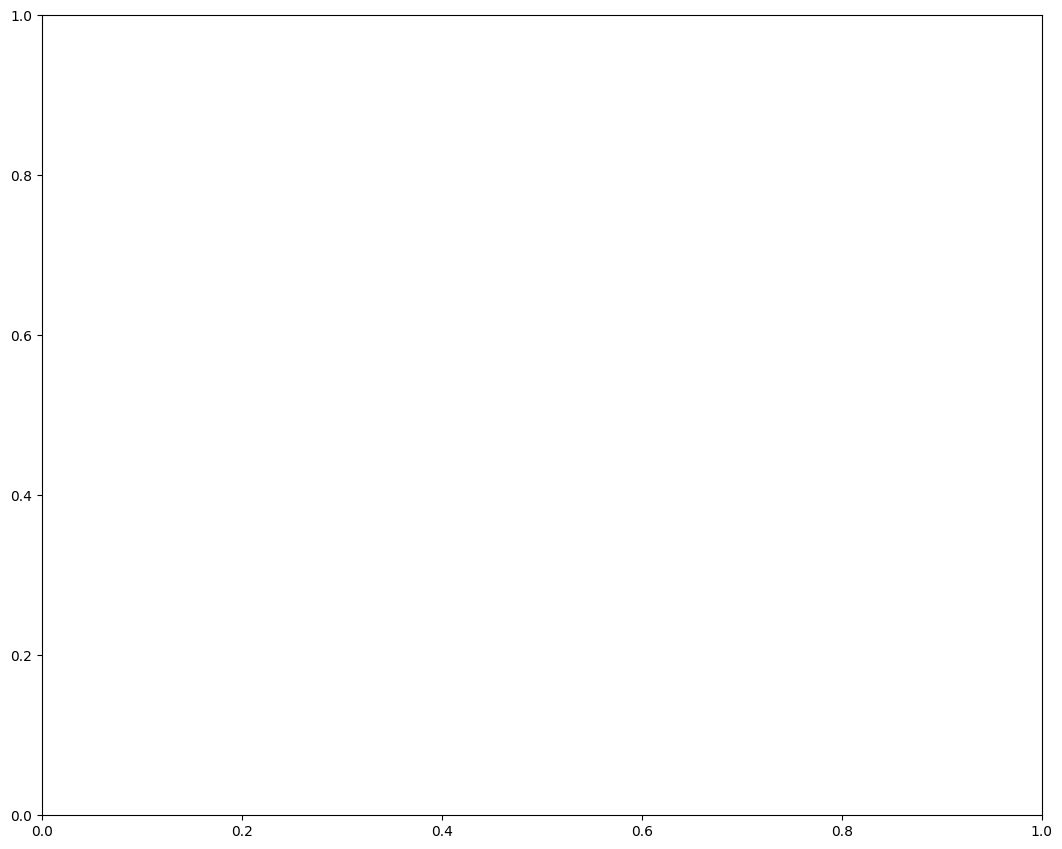

In [35]:
# Create an igraph object from the dataset
# Assuming you have a 'user_id' and 'business_id' column in your dataframe to build the graph
business_graph_1 = ig.Graph()

# Add vertices (businesses)
business_graph_1.add_vertices(df['business_id'].unique())

# Create edges between businesses based on shared users
user_business_pairs = df.groupby('user_id')['business_id'].apply(list)
for businesses in user_business_pairs:
    for i in range(len(businesses)):
        for j in range(i + 1, len(businesses)):
            business_graph_1.add_edge(businesses[i], businesses[j])

# Community detection based on edge betweenness (Newman-Girvan)
communities_1 = business_graph_1.community_edge_betweenness()
communities_1 = communities_1.as_clustering()  # Convert to clustering object for ease of use

# Count the number of communities detected
num_communities_1 = len(communities_1)
print(f"Number of communities detected (Edge Betweenness): {num_communities_1}")

# Create a color palette for the communities
palette_1 = [plt.cm.viridis(i/num_communities_1) for i in range(num_communities_1)]

# Coloring the nodes based on the community they belong to
for i, community in enumerate(communities_1):
    for vertex in community:
        business_graph_1.vs[vertex]["color"] = palette_1[i]  # Assign a color from the palette

# Create a NetworkX graph from the igraph object
nx_graph = nx.Graph()
nx_graph.add_edges_from(business_graph_1.get_edgelist())

# Draw the graph using matplotlib
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph)  # Use spring layout for the nodes
node_colors = [business_graph_1.vs[i]["color"] for i in range(business_graph_1.vcount())]
nx.draw(nx_graph, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500)
plt.title("Graph Visualization with Communities")
plt.show()

# Calculate the degree of each vertex
deg_1 = business_graph_1.degree()

# Check the distribution of the degrees
plt.figure(figsize=(10, 6))  # Optional: specify a figure size
ax = plt.hist(deg_1, bins=range(1, max(deg_1) + 2), edgecolor='black')  # Histogram of node degrees
plt.title("Histogram of Node Degree")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)  # Optional: add a grid for better readability
plt.xticks(range(0, max(deg_1) + 1))  # Optional: set x-ticks for better readability
plt.show()  # Display the histogram

# Identify businesses in each community
community_businesses = {}
for idx, community in enumerate(communities_1):
    community_business_ids = [business_graph_1.vs[vertex]["name"] for vertex in community]
    community_businesses[idx] = community_business_ids

# Display businesses in each community with their categories
for idx, businesses in community_businesses.items():
    print(f"Community {idx}: {businesses}")

# Choose a community based on centrality measures
# Example: Calculate degree centrality for nodes
degree_centrality = nx.degree_centrality(nx_graph)

# Get the community with the highest average degree centrality
community_avg_centrality = {}
for idx, businesses in community_businesses.items():
    avg_centrality = sum(degree_centrality[business] for business in businesses) / len(businesses)
    community_avg_centrality[idx] = avg_centrality

# Select the community with the highest average degree centrality
selected_community_idx = max(community_avg_centrality, key=community_avg_centrality.get)
selected_community_businesses = community_businesses[selected_community_idx]

# Display the selected community
print(f"\nSelected Community based on Degree Centrality: {selected_community_businesses}")

..................................................................ANNEX..........................................................................

NOTE: The following code is to help retrieve and confirm previous information for the selection of the community to study for Time Series Analysis.
Explain in the end, why we choose the community 0 (with higher number of restaurants=402 and avg betweeness of 0.0026, that is the highest in the all communities detected.)


Businesses in Communities Sorted by Betweenness Centrality:

Community 0 (Avg Betweenness: 0.0026):
  Category: Halal, Pakistani, Restaurants, Indian - Businesses: ['kxX2SOes4o-D3ZQBkiMRfA']
  Category: Burgers, Vegetarian, Restaurants, Vegan - Businesses: ['Dv6RfXLYe1atjgz3Xf4GGw']
  Category: Spanish, Restaurants, Breakfast & Brunch, Tapas Bars, Iberian - Businesses: ['S8ZFYEgMejpChID8tzKo9A']
  Category: Coffee & Tea, Beauty & Spas, Cosmetics & Beauty Supply, Shopping, Arts & Crafts, Costumes, Restaurants, Vietnamese, Food - Businesses: ['IjMs1n7UelI7ev_5IDl5kA']
  Category: French, Spanish, Tapas Bars, Cafes, Restaurants, Wine Bars, Modern European, Bars, Nightlife, Italian, Comedy Clubs, Greek, American (New) - Businesses: ['eJaeTZlIdM3HWCq__Ve4Wg']
  Category: Noodles, Seafood, Restaurants, Chinese - Businesses: ['bq0n3CQy1CkE_WUe76zQvg']
  Category: Smokehouse, Barbeque, Food, Restaurants, Buffets - Businesses: ['_UOg5_pk9IhKee91eWrT4A']
  Category: Bakeries, Breakfast & Brunch

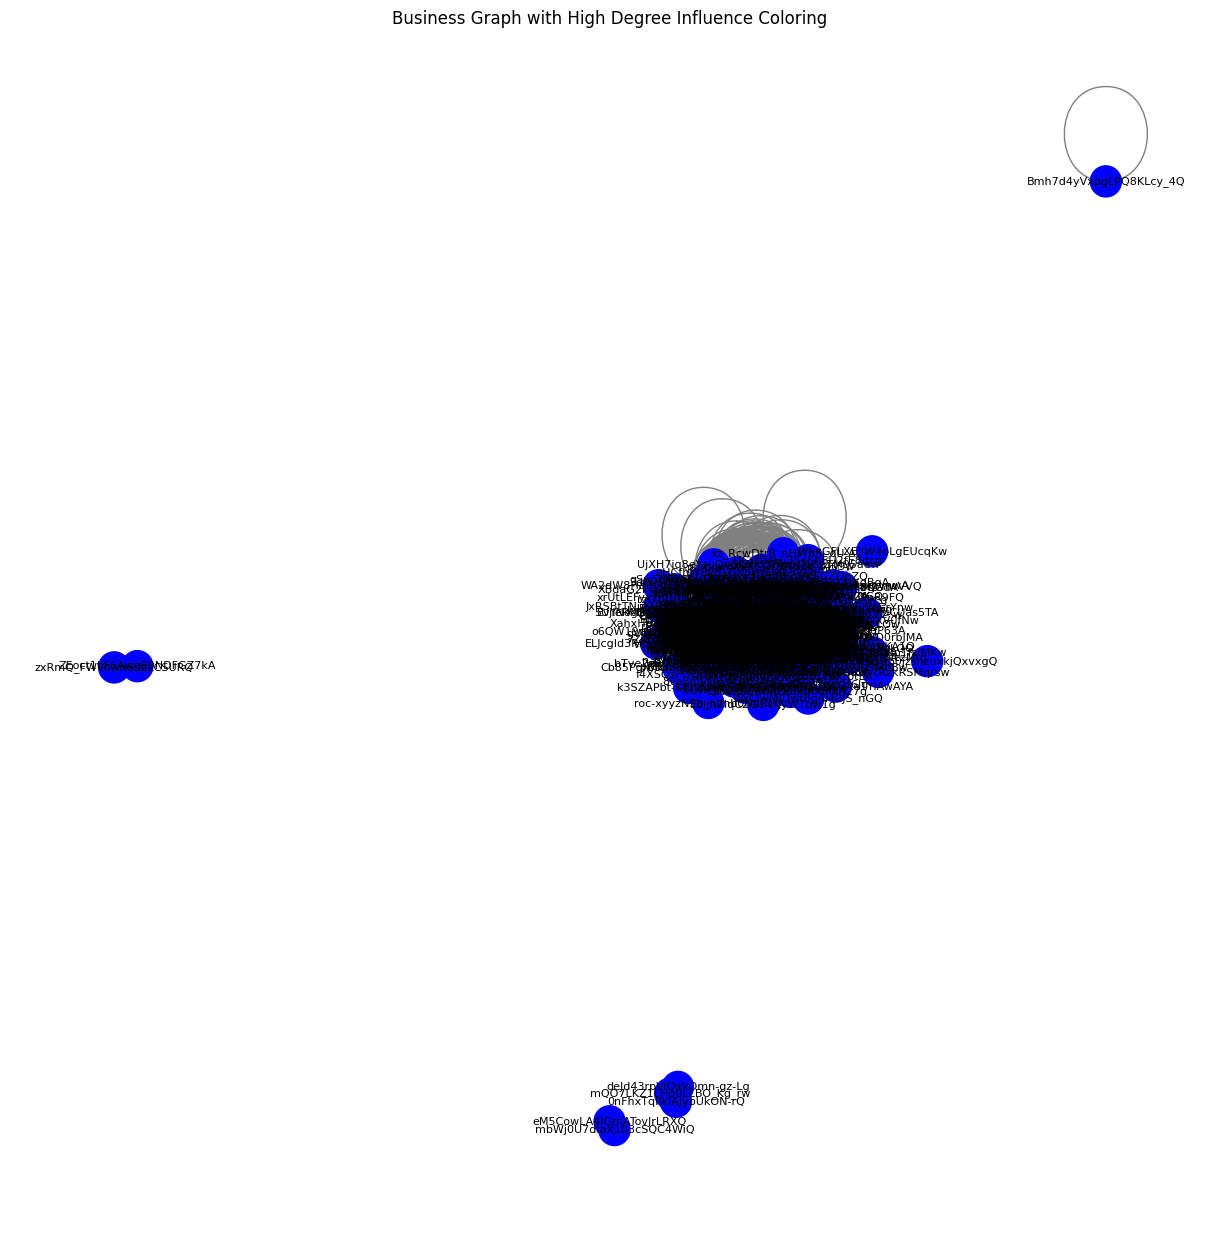


Number of communities detected (Edge Betweenness): 405

Businesses in each community detected by igraph:
Community 0: ['kxX2SOes4o-D3ZQBkiMRfA']
Community 1: ['YtSqYv1Q_pOltsVPSx54SA']
Community 2: ['eFvzHawVJofxSnD7TgbZtg']
Community 3: ['kq5Ghhh14r-eCxlVmlyd8w']
Community 4: ['oBhJuukGRqPVvYBfTkhuZA', 'EtKSTHV5Qx_Q7Aur9o4kQQ', 'Dv6RfXLYe1atjgz3Xf4GGw', 'eaDZlSuVS0EY67Ke6pRP6Q', '-ATiAtTikuGuqvaW2O6tNA', 'MMRRS6YhVRx_iN5-JhMRYg', 'QWqKTWQ2OiDgo3dzNkpung', 'cXSyVvOr9YRN9diDkaWs0Q', 'JUlsvVAvZvGHWFfkKm0nlg', 'htO_nlxkEsYHzDrtbiUxew', 'Q-prSTdggNlxAEFV88BZOw', 'j99PtxlKTW_u5alE4jiqHQ', '7lwe7n-Yc-V9E_HfLAeylg', 'OHzX-ZD9qyoeoxR8Z0dlIA', 'Oun4NN-u5yiHIxDqtJnxgA', 'lRbHFOIFuusN2WOR_ypQ_A', 'sdWuLh-auc0nC2Jy6_26AQ', '1UNorskttXSWuEcgzKzXcA', 'F8yozE3NWnImNApHO347gQ', 'LM54ufrINJWoTN5imV8Etw', '73UjNbSoQjQAOS45rcihFg', 'j6usntbtSzFyuwx4n2mn1g', 'aUoMG97DMJG4nmwhT6z1zA', '0oSSjekU-3GR8gselReWnA', 'j-qtdD55OLfSqfsWuQTDJg', 'Iw8uqNPxviwcgxtruAx_LA', 'ldr7iDtxFXX-q7tJuXqlGQ', 'S8ZFYEgMejpChID8t

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms.community import girvan_newman
import igraph as ig  # Import igraph

# Step 1: Load your dataset
df = pd.read_csv('C:\\Users\\anacc\\OneDrive\\Ambiente de Trabalho\\2nd year-master\\Análise Dados Complexos\\data\\Philadelphia_reviews.csv', encoding="utf-8")

# Step 2: Create the business-user graph using NetworkX
G = nx.Graph()

# Assuming df has 'user_id', 'business_id', and 'categories' columns
for user in df.user_id.unique():
    user_reviews = df[df.user_id == user]
    business_ids = user_reviews.business_id.tolist()
    
    # Create edges between all combinations of businesses reviewed by the same user
    for business_pair in combinations(business_ids, 2):
        G.add_edge(business_pair[0], business_pair[1])

# Step 3: Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Store centrality in the graph nodes
for node in G.nodes:
    G.nodes[node]['degree_centrality'] = degree_centrality[node]
    G.nodes[node]['betweenness_centrality'] = betweenness_centrality[node]
    G.nodes[node]['eigenvector_centrality'] = eigenvector_centrality[node]

# Step 4: Community Detection using Girvan-Newman
communities = girvan_newman(G)
first_communities = list(next(communities))

# Get community assignments
community_assignments = {}
for i, community in enumerate(first_communities):
    for node in community:
        community_assignments[node] = i

# Step 5: Group businesses by category and calculate average betweenness
category_communities = {}
community_betweenness = {}

for business_id in G.nodes:
    # Get the category of the business from the DataFrame
    categories = df.loc[df.business_id == business_id, 'categories'].values
    if categories.size > 0:
        category = categories[0]  # Assuming one category per business for simplicity
        comm_id = community_assignments[business_id]
        
        # Add business to category-communities mapping
        if category not in category_communities:
            category_communities[category] = {}
        if comm_id not in category_communities[category]:
            category_communities[category][comm_id] = []
        category_communities[category][comm_id].append(business_id)

        # Calculate average betweenness centrality for this community
        if comm_id not in community_betweenness:
            community_betweenness[comm_id] = []
        community_betweenness[comm_id].append(G.nodes[business_id]['betweenness_centrality'])

# Calculate average betweenness centrality for each community
average_betweenness = {comm_id: sum(betweenness) / len(betweenness) for comm_id, betweenness in community_betweenness.items()}

# Sort communities by average betweenness centrality (descending)
sorted_communities = sorted(average_betweenness.items(), key=lambda x: x[1], reverse=True)

# Step 6: Print businesses in each community by category, sorted by betweenness centrality
print("\nBusinesses in Communities Sorted by Betweenness Centrality:")
for comm_id, avg_bet in sorted_communities:
    print(f"\nCommunity {comm_id} (Avg Betweenness: {avg_bet:.4f}):")
    for category, communities in category_communities.items():
        if comm_id in communities:
            print(f"  Category: {category} - Businesses: {communities[comm_id]}")

# Step 7: Visualize the graph with color coding by centrality
plt.figure(figsize=(12, 12))

# Create color mapping based on degree centrality
node_colors = []
for node in G.nodes:
    centrality = G.nodes[node]['degree_centrality']
    if centrality > 0.1:  # Example threshold
        node_colors.append('green')  # High influence
    else:
        node_colors.append('blue')  # Lower influence

# Position the nodes using spring layout
pos = nx.spring_layout(G)

# Draw the graph with labels for business IDs
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=8)

plt.title("Business Graph with High Degree Influence Coloring")
plt.show()

# Step 8: Creating an igraph object
business_graph_1 = ig.Graph()

# Add vertices (businesses)
business_graph_1.add_vertices(df['business_id'].unique())

# Create edges between businesses based on shared users
user_business_pairs = df.groupby('user_id')['business_id'].apply(list)

for business_ids in user_business_pairs:
    for business_pair in combinations(business_ids, 2):
        business_graph_1.add_edge(business_pair[0], business_pair[1])

# Step 9: Community detection using edge betweenness in igraph
communities_1 = business_graph_1.community_edge_betweenness()
communities_1 = communities_1.as_clustering()  # Convert to clustering object for ease of use

# Count the number of communities detected
num_communities_1 = len(communities_1)
print(f"\nNumber of communities detected (Edge Betweenness): {num_communities_1}")

# Get community assignments in igraph
community_assignments_1 = {}
for i, community in enumerate(communities_1):
    for vertex in community:
        community_assignments_1[vertex] = i

# Print businesses in each community from igraph
print("\nBusinesses in each community detected by igraph:")
for comm_id in range(num_communities_1):
    community_businesses = [business_graph_1.vs[vertex]['name'] for vertex in communities_1[comm_id]]
    print(f"Community {comm_id}: {community_businesses}")


In [24]:
num_communities_1

405

In [ ]:
# Step 6: Print businesses in each community by category, sorted by betweenness centrality
print("\nBusinesses in Communities Sorted by Betweenness Centrality:")
for comm_id, avg_bet in sorted_communities:
    print(f"\nCommunity {comm_id} (Avg Betweenness: {avg_bet:.4f}):")
    for category, communities in category_communities.items():
        if comm_id in communities:
            print(f"  Category: {category} - Businesses: {communities[comm_id]}")

In [32]:
output

0     1     2     3     4     5     6     7     8
0    kxX2SOes4o-D3ZQBkiMRfA  None  None  None  None  None  None  None  None
1    Dv6RfXLYe1atjgz3Xf4GGw  None  None  None  None  None  None  None  None
2    S8ZFYEgMejpChID8tzKo9A  None  None  None  None  None  None  None  None
3    IjMs1n7UelI7ev_5IDl5kA  None  None  None  None  None  None  None  None
4    eJaeTZlIdM3HWCq__Ve4Wg  None  None  None  None  None  None  None  None
..                      ...   ...   ...   ...   ...   ...   ...   ...   ...
397  xrUtLEFyxzfjflTC2nqLXQ  None  None  None  None  None  None  None  None
398  bACIZGdHRFfNtrufH0wMbQ  None  None  None  None  None  None  None  None
399  Je10gqBQIqSvYNS8XGrYnw  None  None  None  None  None  None  None  None
400  xz_RcwDtr8_nHWnSj-oU-A  None  None  None  None  None  None  None  None
401  JxRSBtTNuLULDfKI3YGQSA  None  None  None  None  None  None  None  None

[402 rows x 9 columns]

In [42]:
output.columns

RangeIndex(start=0, stop=9, step=1)

In [43]:
output = output.iloc[:, 0]

In [44]:

output

0      kxX2SOes4o-D3ZQBkiMRfA
1      Dv6RfXLYe1atjgz3Xf4GGw
2      S8ZFYEgMejpChID8tzKo9A
3      IjMs1n7UelI7ev_5IDl5kA
4      eJaeTZlIdM3HWCq__Ve4Wg
                ...          
397    xrUtLEFyxzfjflTC2nqLXQ
398    bACIZGdHRFfNtrufH0wMbQ
399    Je10gqBQIqSvYNS8XGrYnw
400    xz_RcwDtr8_nHWnSj-oU-A
401    JxRSBtTNuLULDfKI3YGQSA
Name: 0, Length: 402, dtype: object

In [45]:
output.to_csv("C:\\Users\\anacc\\OneDrive\\Ambiente de Trabalho\\2nd year-master\\Análise Dados Complexos\\data\\output.csv",index= False)

In [35]:
output.describe()


0                       1  \
count                      402                      18   
unique                     402                      18   
top     JxRSBtTNuLULDfKI3YGQSA  Iyopb5uFIBT_HOgp8ipSfw   
freq                         1                       1   

                             2                       3  \
count                        7                       6   
unique                       7                       6   
top     jZxs7PDhUbhg4LWSFM4Z_A  -CRjqZ4GxZ6lIa_qMj7-yw   
freq                         1                       1   

                             4                       5  \
count                        6                       3   
unique                       6                       3   
top     KgozvZ1UFfXuJToqe8CfQg  MN-Em6pY0ZXZQsLv6uBhrA   
freq                         1                       1   

                             6                       7                       8  
count                        2                       1                       1  
unique                       2                       1                       1  
top     6g3pHoyXeMXFC7WD0rbJMA  y9XVl5058TPjHcO6O2HBaA  rz_an69uzlVtRzkRSMqrsw  
freq                         1                       1                       1

Note: This is presented in the class presentation showing that the community 0 is the one selected because contains 402 businesses restaurants and the average betweeness of 0.0026. Eventhough this last is a lower number, is the biggest of the all communities. Since the data is spars, we have to by the best combination of indicators, in this case the highest avg betweeness and number of communities to explore more connections and more market patterns.

In [25]:
sorted_communities

[(0, 0.0026220495294594966),
 (1, 0.0021590744057704407),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0)]